<div class="alert alert-block alert-success">
    <h1> 1-Understand the data :</h1>
    
- Upload the data and take a look of columns and data types
- Identfy the target Label
    
</div>

## Import Libraries

In [1]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Deep Learning Library
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dense, BatchNormalization

In [4]:
df=pd.read_csv(r"/content/bank-additional-full.csv",delimiter=';')

# Data Card:

- **Age**:Age of the client
- **Job**: Type of job
- **Marital**: Marital status
- **Education**: Education level
- **Default**:Whether the client has a credit default
- **Housing_Loan**:Whether the client has a housing loan
- **Personal_Loan**:Whether the client has a personal loan
- **Contact**:Type of contact communication used during the campaign
- **Month**:Month of the last contact
- **Day_Of_Week**:Day of the week when the last contact occurred
- **Duration**:Duration of the call (in seconds)
- **Campaign**:Number of contacts performed during this campaign for the client
- **P_Days**:Number of days since the client was last contacted from a previous campaign.
- **Previous**:Number of contacts performed before this campaign for this client
- **P_Outcome**:Outcome of the previous marketing campaign
- **Employment_Var_Rate**:Employment variation rate
- **Consumer_Price_idx**:Consumer price index
- **Consumer_Conf_idx**:Consumer confidence index
- **Euribor3_Rate**:Euribor 3-month rate
- **No_of_Employees**:Number of employees
- **Subscribed**: whether the client subscribed to a term deposit "Yes" or "No"

## Data Size
- Indicates the data size in terms of columns and rows.
- The shape function returns the number of columns and rows.

In [5]:
df.shape

(41188, 21)

## Data Preview:
- This step allows us to examine the data's appearance.
- `head()` shows the first few rows of the dataset.
- `sample()` displays a random sample from the dataset.

In [6]:
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.sample(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27751,38,technician,married,professional.course,no,no,yes,cellular,mar,thu,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,yes
22599,29,technician,single,professional.course,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
36513,57,entrepreneur,married,basic.4y,no,yes,no,cellular,jun,wed,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
18939,56,admin.,married,university.degree,no,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
26021,55,management,married,professional.course,no,yes,no,cellular,nov,wed,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
31079,33,blue-collar,married,basic.9y,no,yes,no,cellular,may,wed,...,1,11,1,success,-1.8,92.893,-46.2,1.334,5099.1,no
39889,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,1,999,0,nonexistent,-1.7,94.055,-39.8,0.729,4991.6,yes


## Data Types:
- Use `info()` to get dataset details.
- Use dtypes to determine each column's data type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- we can see no null values on the data.
- The object data type should be converted to category for better handling.
- We should also apply encoding to categorical data.

#### Modifiy column names for a more formal presentation.

In [9]:
df.columns=['Age','Job','Marital','Education','Default','Housing_Loan','Personal_Loan',
            'Contact','Month','Day_Of_Week','Duration','Campaign','P_Days','Previous',
            'P_Outcome','Employment_Var_Rate','Consumer_Price_idx','Consumer_Conf_idx',
            'Euribor3_Rate','No_of_Employees','Subscribed']

#### Change In-correct Datatypes

In [10]:
cols=df.select_dtypes('object').columns
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Age,Job,Marital,Education,Default,Housing_Loan,Personal_Loan,Contact,Month,Day_Of_Week,...,Campaign,P_Days,Previous,P_Outcome,Employment_Var_Rate,Consumer_Price_idx,Consumer_Conf_idx,Euribor3_Rate,No_of_Employees,Subscribed
0,int64,category,category,category,category,category,category,category,category,category,...,int64,int64,int64,category,float64,float64,float64,float64,float64,category


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  41188 non-null  int64   
 1   Job                  41188 non-null  category
 2   Marital              41188 non-null  category
 3   Education            41188 non-null  category
 4   Default              41188 non-null  category
 5   Housing_Loan         41188 non-null  category
 6   Personal_Loan        41188 non-null  category
 7   Contact              41188 non-null  category
 8   Month                41188 non-null  category
 9   Day_Of_Week          41188 non-null  category
 10  Duration             41188 non-null  int64   
 11  Campaign             41188 non-null  int64   
 12  P_Days               41188 non-null  int64   
 13  Previous             41188 non-null  int64   
 14  P_Outcome            41188 non-null  category
 15  Employment_Var_Rate

## Encoding:
- `Label Encoding`: for Ordinal and binary data.
- `One Hot Encoding`: for Nominal data.

In [12]:
#1.Label Encoder:
from sklearn.preprocessing import LabelEncoder

#take a copy of the data
data_encoded = df.copy()

#binary data
binary_columns = ['Default', 'Housing_Loan', 'Personal_Loan', 'Subscribed']
#Ordinal data
ordinal_columns = ['Education', 'Month']

label_encoder = LabelEncoder()
for col in binary_columns + ordinal_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])


In [13]:
#2.One Hot Encoder:
from sklearn.preprocessing import OneHotEncoder

#nominal data
nominal_columns = ['Job', 'Marital', 'Contact', 'Day_Of_Week', 'P_Outcome']
data_encoded = pd.get_dummies(data_encoded, columns=nominal_columns, drop_first=True)
data_encoded = data_encoded.astype(int)

In [14]:
data_encoded.head()

,Age,Education,Default,Housing_Loan,Personal_Loan,Month,Duration,Campaign,P_Days,Previous,...,Marital_married,Marital_single,Marital_unknown,Contact_telephone,Day_Of_Week_mon,Day_Of_Week_thu,Day_Of_Week_tue,Day_Of_Week_wed,P_Outcome_nonexistent,P_Outcome_success
0,56,0,0,0,0,6,261,1,999,0,...,1,0,0,1,1,0,0,0,1,0
1,57,3,1,0,0,6,149,1,999,0,...,1,0,0,1,1,0,0,0,1,0
2,37,3,0,2,0,6,226,1,999,0,...,1,0,0,1,1,0,0,0,1,0
3,40,1,0,0,0,6,151,1,999,0,...,1,0,0,1,1,0,0,0,1,0
4,56,3,0,0,2,6,307,1,999,0,...,1,0,0,1,1,0,0,0,1,0


## Missing Values:
- Check for nulls or missing values.
- Use `isnull().sum()` to get the total number of missing values per column.

In [15]:
df.isnull().sum()

,0
Age,0
Job,0
Marital,0
Education,0
Default,0
Housing_Loan,0
Personal_Loan,0
Contact,0
Month,0
Day_Of_Week,0


- No null values in the data.

## Duplicated Data  
- Check for and remove duplicated values  
- Use `duplicated().sum()` to identify duplicates

In [16]:
data_encoded.duplicated().sum()

13

In [17]:
data_encoded.drop_duplicates(inplace=True)

## Exploring Diversity:
- Determine the number of unique values in the dataset.
- Use `nunique()` to return the count of unique values.

In [18]:
data_encoded.nunique()

,0
Age,78
Education,8
Default,3
Housing_Loan,3
Personal_Loan,3
Month,10
Duration,1544
Campaign,42
P_Days,27
Previous,8


In [19]:
cols=df.columns
for col in cols:
    print(f"{col}:")
    print(df[col].value_counts)
    print('-'*20)

Age:
<bound method IndexOpsMixin.value_counts of 0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: Age, Length: 41188, dtype: int64>
--------------------
Job:
<bound method IndexOpsMixin.value_counts of 0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: Job, Length: 41188, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']>
--------------------
Marital:
<bound method IndexOpsMixin.value_counts of 0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: Marital

## Statistical Overview
- Obtain statistical measures of the data.
- The `describe()` function provides statistical measures for each column.

In [20]:
data_encoded.describe()

,Age,Education,Default,Housing_Loan,Personal_Loan,Month,Duration,Campaign,P_Days,Previous,...,Marital_married,Marital_single,Marital_unknown,Contact_telephone,Day_Of_Week_mon,Day_Of_Week_thu,Day_Of_Week_tue,Day_Of_Week_wed,P_Outcome_nonexistent,P_Outcome_success
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,...,41175.000000,41175.00000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000
mean,40.023898,3.746958,0.208913,1.071815,0.327529,4.230990,258.318421,2.567917,962.463922,0.173018,...,0.605222,0.28085,0.001943,0.365294,0.206727,0.209302,0.196357,0.197547,0.863388,0.033345
std,10.420788,2.136548,0.406716,0.985303,0.723707,2.319985,259.307930,2.770341,186.939285,0.494970,...,0.488809,0.44942,0.044036,0.481518,0.404963,0.406815,0.397246,0.398153,0.343441,0.179539
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,0.000000,0.000000,3.000000,102.000000,1.000000,999.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,3.000000,0.000000,2.000000,0.000000,4.000000,180.000000,2.000000,999.000000,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,6.000000,0.000000,2.000000,0.000000,6.000000,319.000000,3.000000,999.000000,0.000000,...,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,7.000000,2.000000,2.000000,2.000000,9.000000,4918.000000,56.000000,999.000000,7.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- we can notice that there is outliers in some columns, we need to draw boxplot to check if there is outliers and handleit.

# Outliers

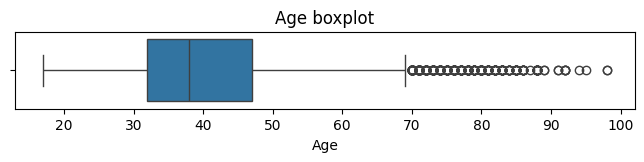

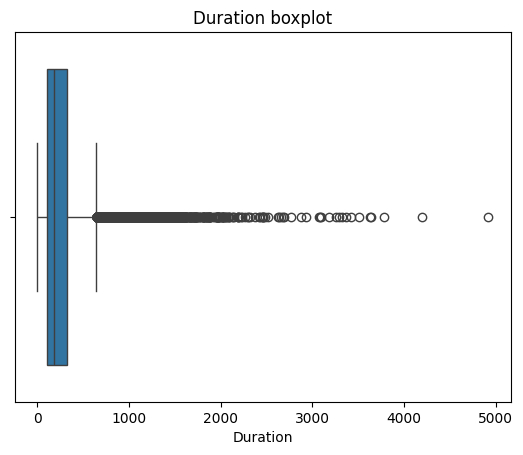

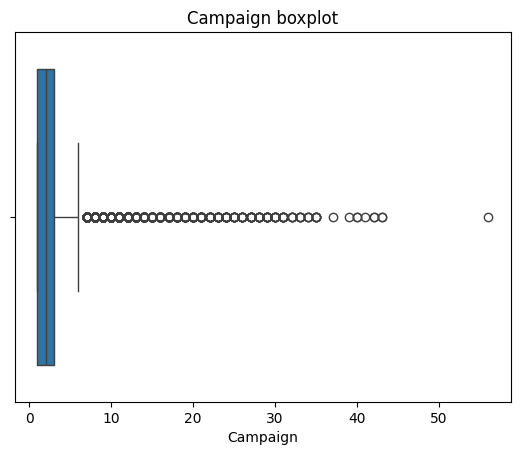

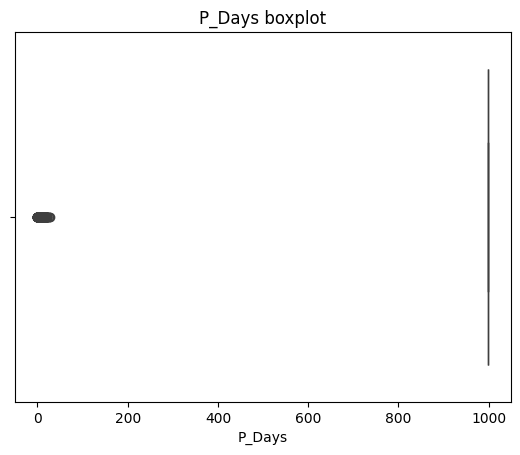

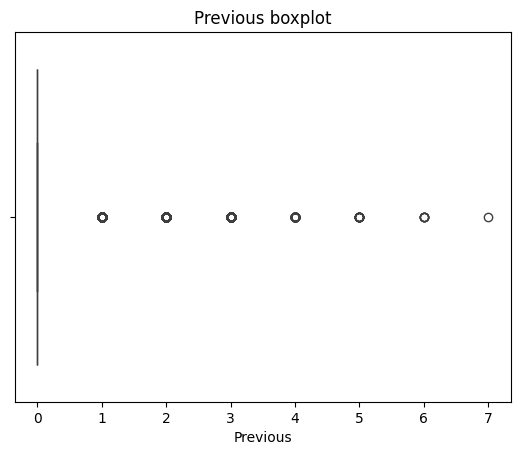

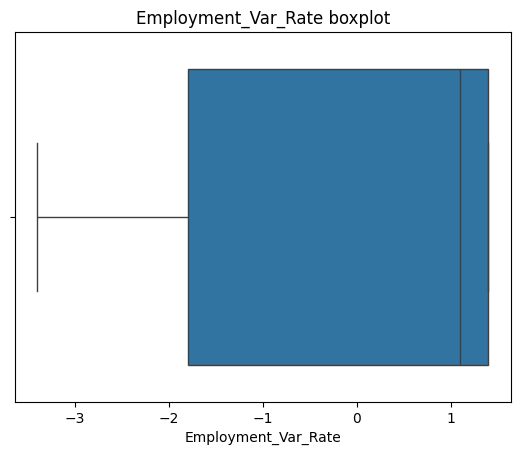

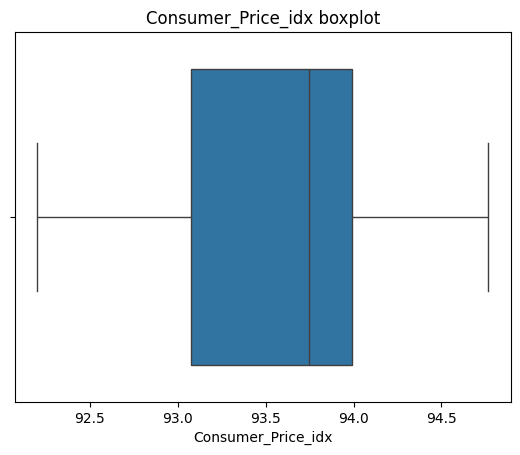

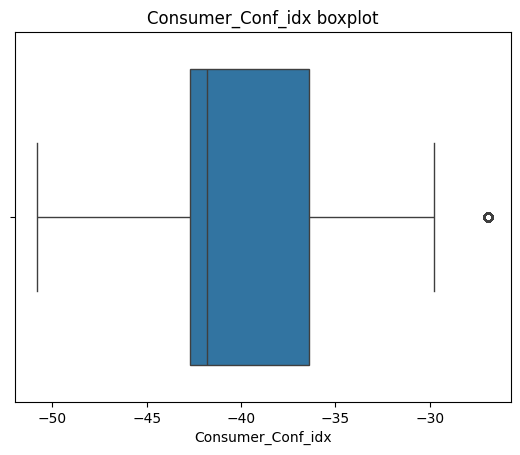

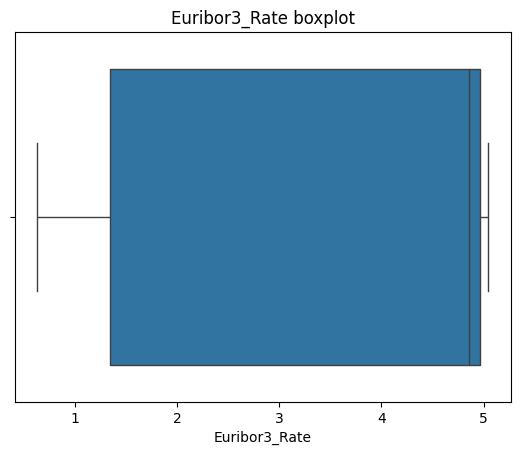

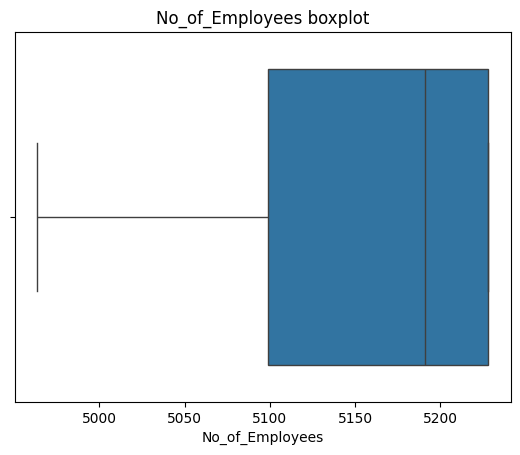

In [21]:
cols = df.select_dtypes('number')
plt.figure(figsize=(8, 1))
for col in cols:
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

- we can notice there is outliers in `Age`, `Duration`, `Campaign`,`P_Days` and `Consumer_Conf_idx` Columns and should be handle.

#### P_Days Column:

In [22]:
df['P_Days'].value_counts()

,count
P_Days,
999,39673
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


- Since the value 999 means "no contact with the customer," it is not an outlier but rather represents a specific and important condition in the analysis. Therefore, it should not be excluded as an outlier; instead, it should be handled separately to analyze the impact of customers with no contact compared to other customers.

In [23]:
no_contact = data_encoded[data_encoded['P_Days'] == 999]
contacted = data_encoded[data_encoded['P_Days'] != 999]

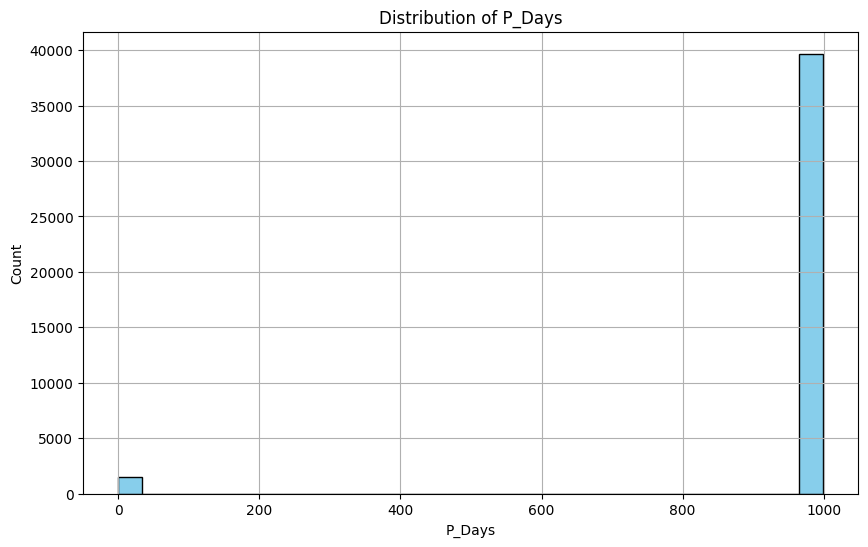

In [24]:
# Distrbution of P_Days
plt.figure(figsize=(10, 6))
df['P_Days'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of P_Days')
plt.xlabel('P_Days')
plt.ylabel('Count')
plt.show()

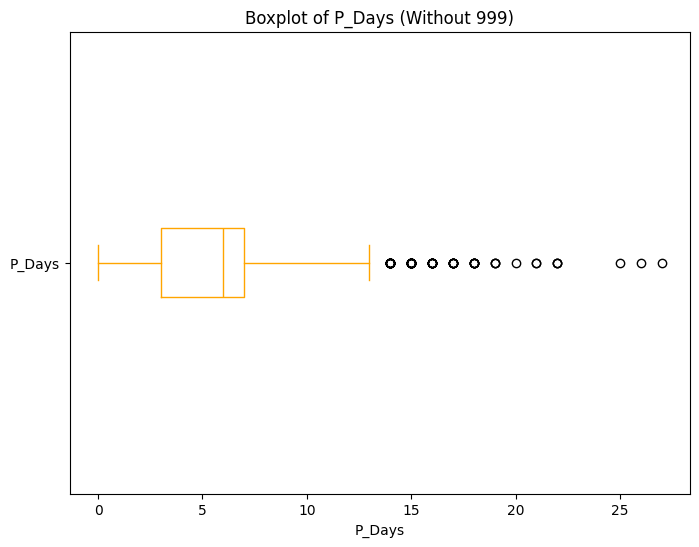

In [25]:
# draw boxplot for the data without 999.
plt.figure(figsize=(8, 6))
contacted['P_Days'].plot(kind='box', vert=False, color='orange')
plt.title('Boxplot of P_Days (Without 999)')
plt.xlabel('P_Days')
plt.show()


### Handle outliers in the P_days without 999:

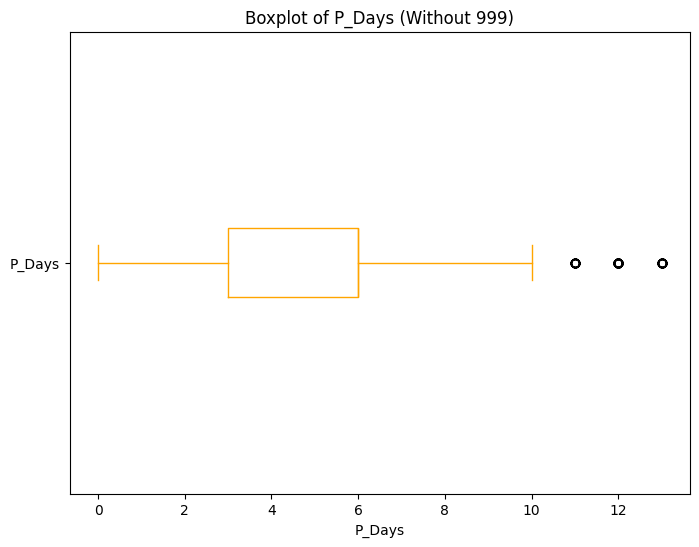

In [26]:
Q1 = contacted['P_Days'].quantile(0.25)
Q3 = contacted['P_Days'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
contacted= contacted[(contacted['P_Days'] >= lower_bound) & (contacted['P_Days'] <= upper_bound)]
contacted= contacted[(contacted['P_Days'] <= upper_bound) & (contacted['P_Days'] >= lower_bound)]

# draw boxplot for the data without 999 to check outliers are reomved
plt.figure(figsize=(8, 6))
contacted['P_Days'].plot(kind='box', vert=False, color='orange')
plt.title('Boxplot of P_Days (Without 999)')
plt.xlabel('P_Days')
plt.show()


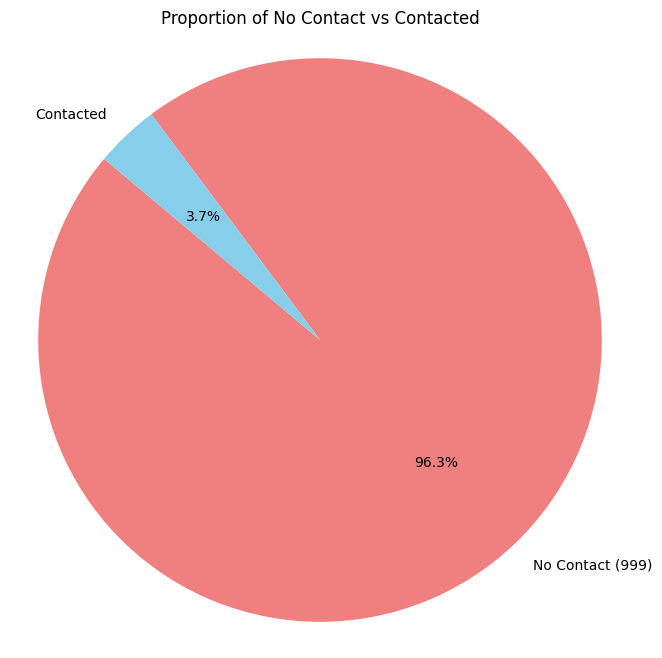

In [27]:
# calculate Percentege
counts = data_encoded['P_Days'].value_counts()
labels = ['No Contact (999)', 'Contacted']
sizes = [counts[999], len(data_encoded) - counts[999]]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=140)
plt.title('Proportion of No Contact vs Contacted')
plt.axis('equal')
plt.show()


Based on the previous analyses, we can draw several important insights:

- The value "999" comprises **96.3%** of the data in the column, indicating a lack of contact with the customer.
- The presence of "999" is interpreted as no contact with the customer.
- We have opted to drop outliers in the `P_days` column that do not contain the value "999."

Now, we will create a new column titled `Contacted` in place of `P_days`:

- In this new column, we will convert every instance of "999" to **0**, signifying no contact with the customer.
- Conversely, we will convert all other values to **1**, indicating that there has been contact with the customer.

By implementing these changes, we will improve the clarity and usefulness of our customer contact data.


In [28]:
# add Contacted column
data_encoded['Contacted'] = data_encoded['P_Days'].apply(lambda x: 0 if x == 999 else 1)
#Drop P_days Column
data_encoded.drop(columns='P_Days',axis=1,inplace=True)

In [29]:
data_encoded['Contacted'].value_counts()

,count
Contacted,
0,39660
1,1515


## Handle outliers
- handle the other columns

In [30]:
cols=['Age','Duration','Campaign','Consumer_Conf_idx']
for col in cols:
    #Check to make sure the column is numeric
    if pd.api.types.is_numeric_dtype(data_encoded[col]):
        Q1 = data_encoded[col].quantile(.25)
        Q3 = data_encoded[col].quantile(.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - 1.5 * IQR
        Upper_Fence = Q3 + 1.5 * IQR
        Lower_Outliers = data_encoded[data_encoded[col] < Lower_Fence][col].values
        Upper_Outliers = data_encoded[data_encoded[col] > Upper_Fence][col].values
        data_encoded[col] = data_encoded[col].where(data_encoded[col] >= Lower_Fence, Lower_Fence)
        data_encoded[col] = data_encoded[col].where(data_encoded[col] <= Upper_Fence, Upper_Fence)

- Ensure outliers are removed successfully

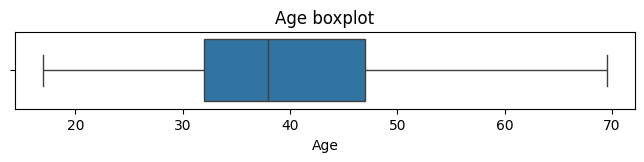

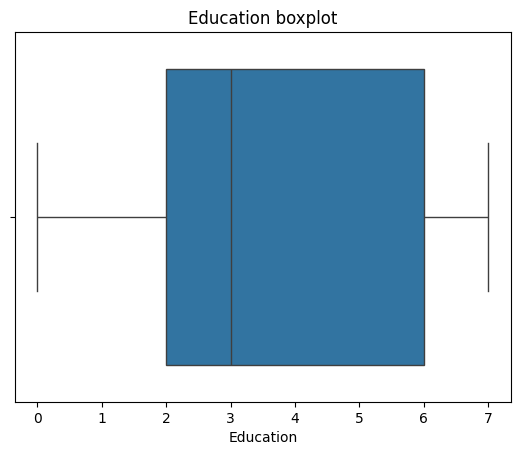

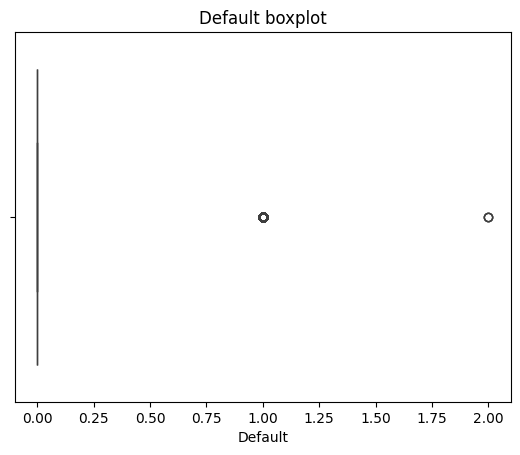

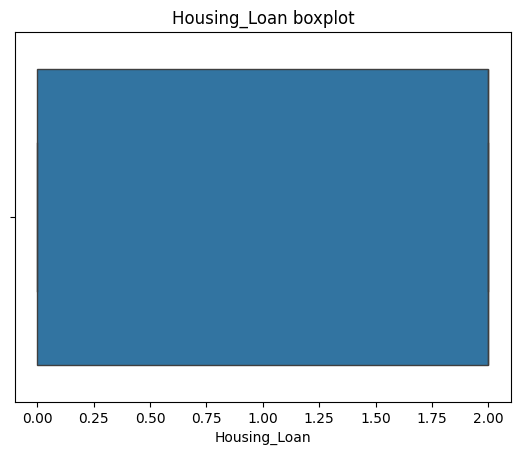

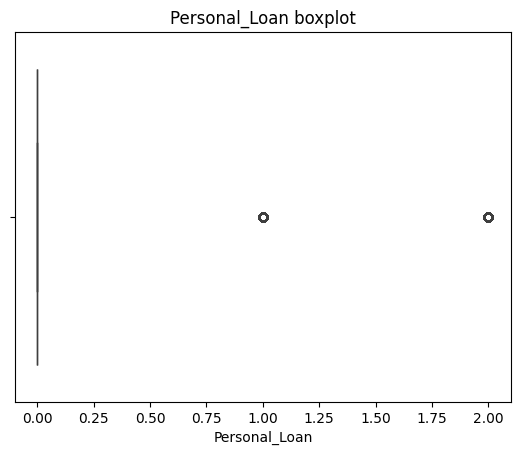

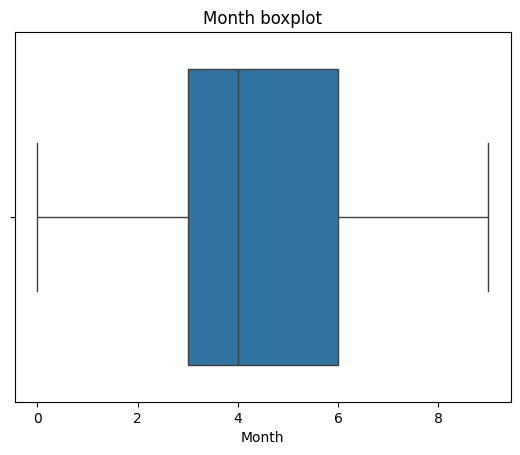

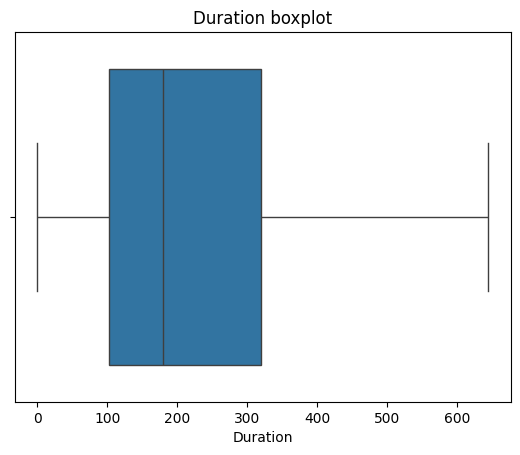

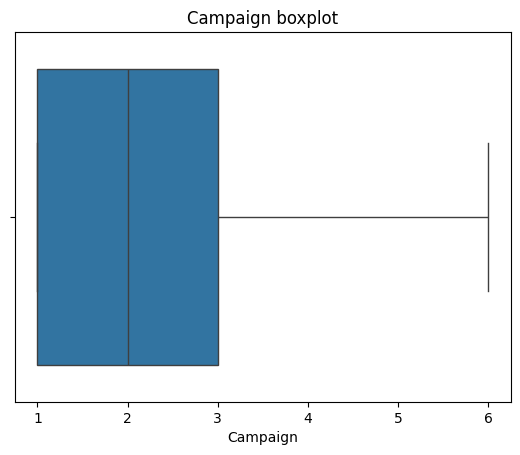

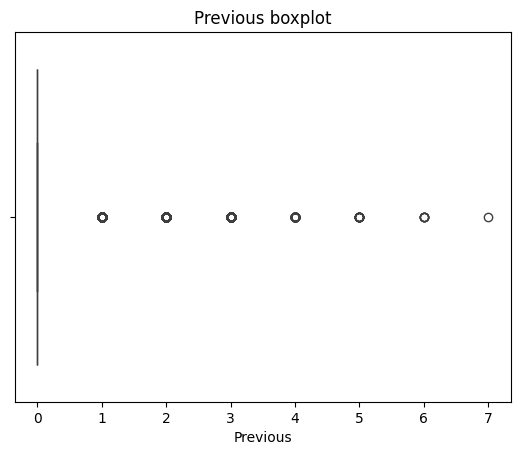

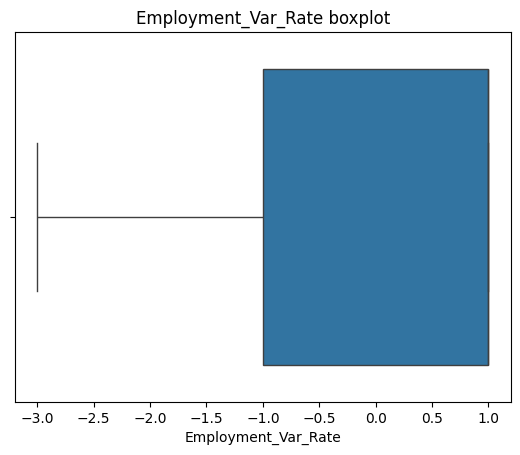

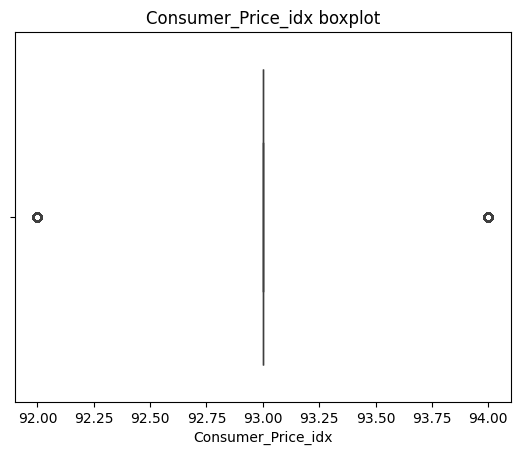

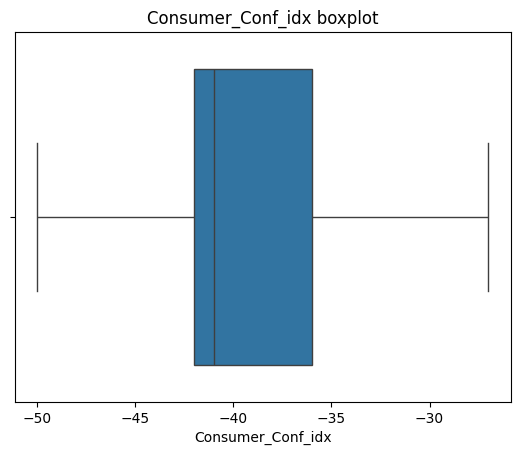

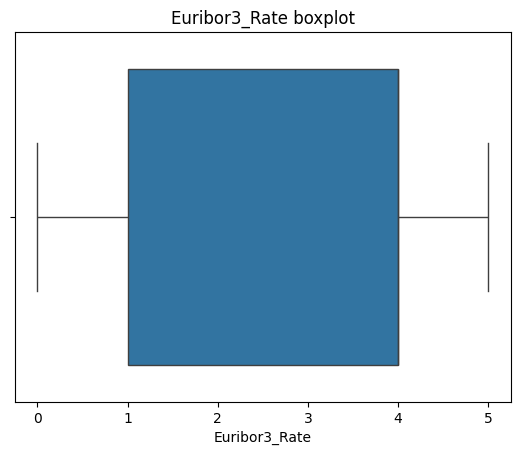

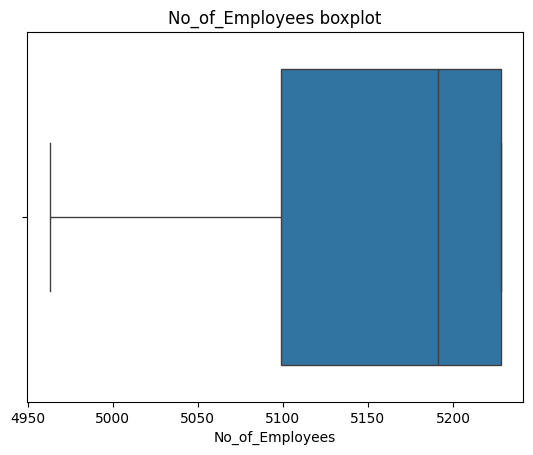

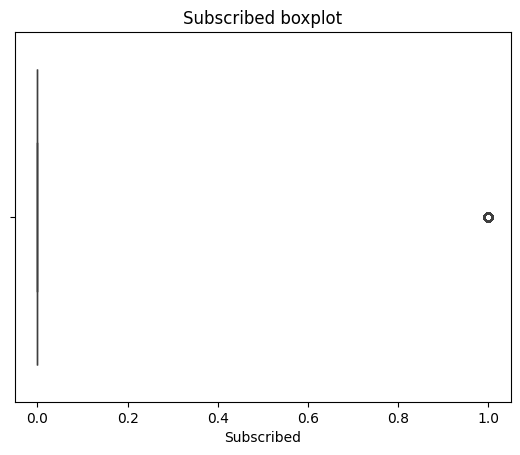

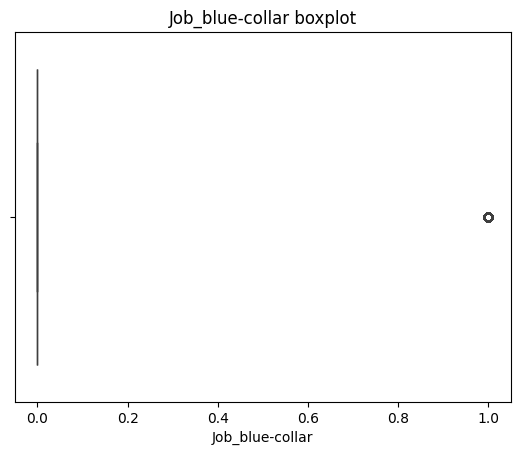

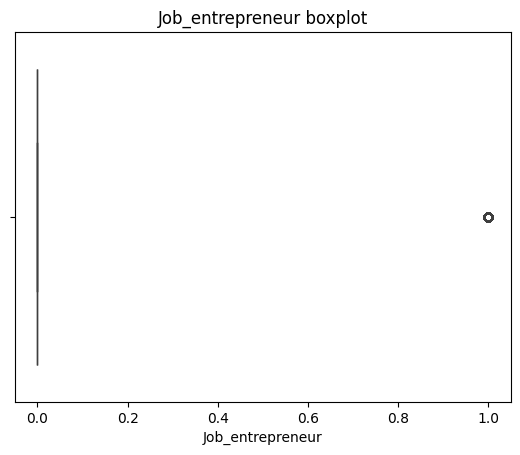

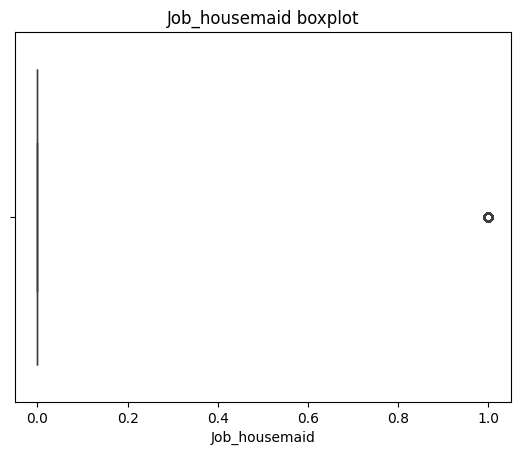

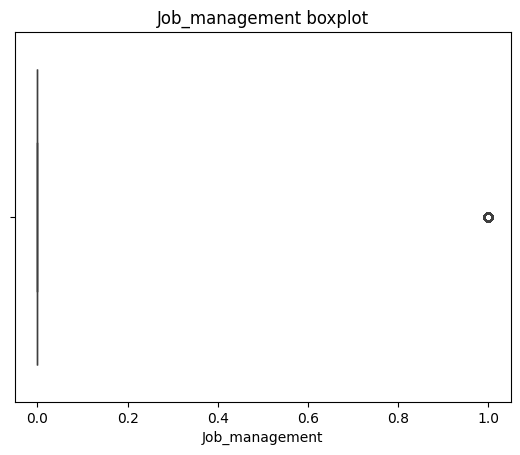

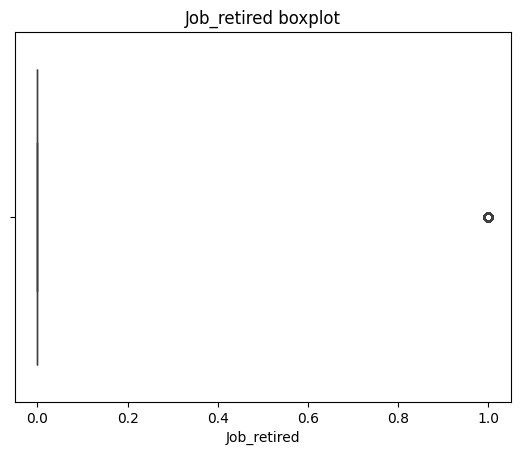

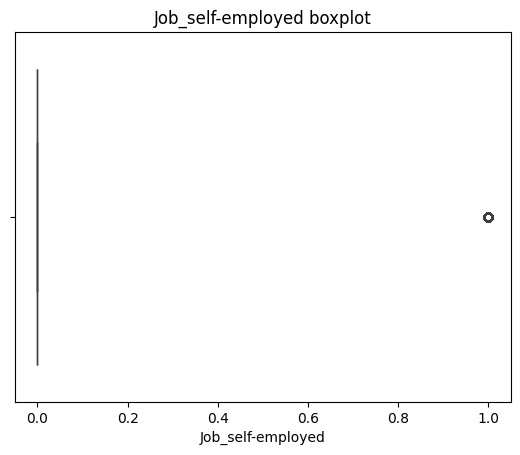

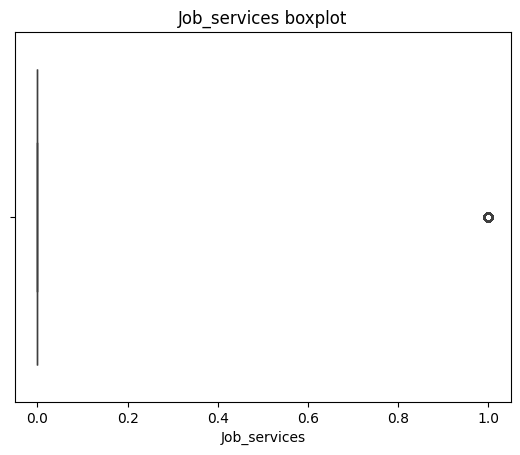

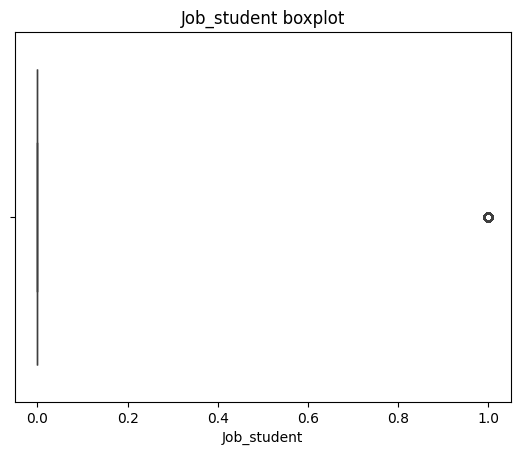

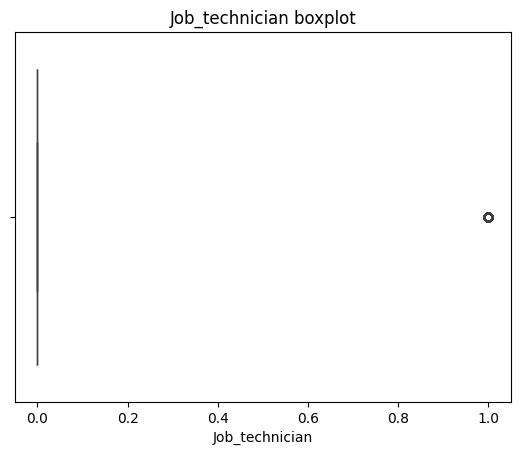

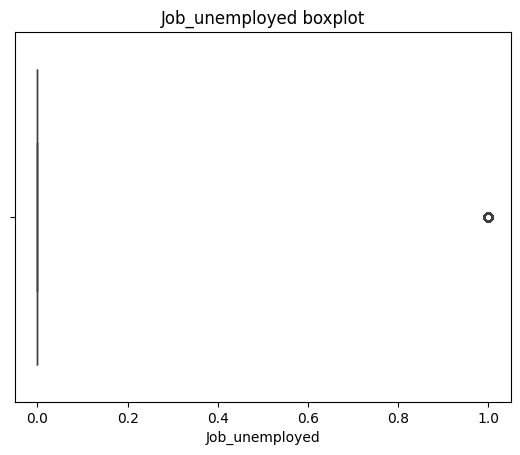

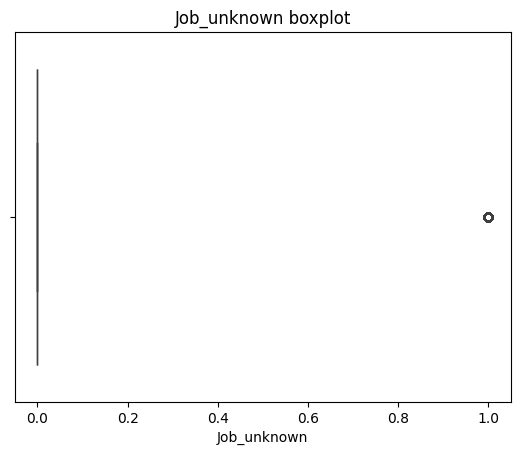

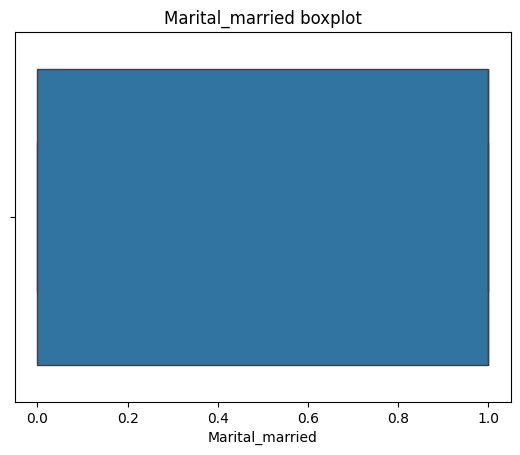

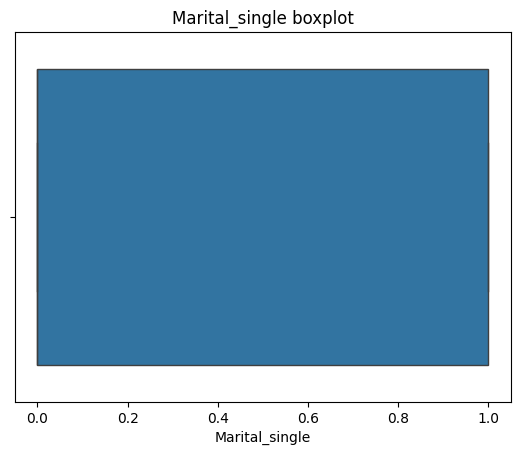

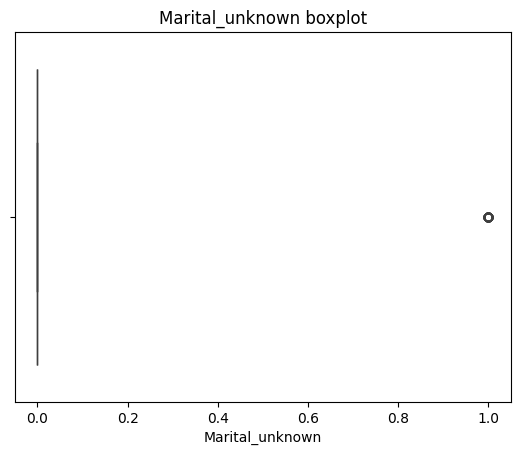

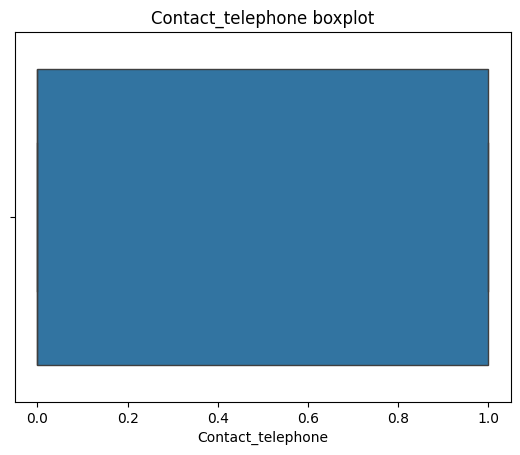

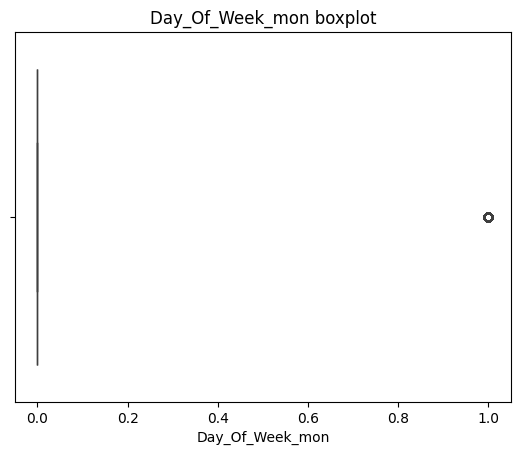

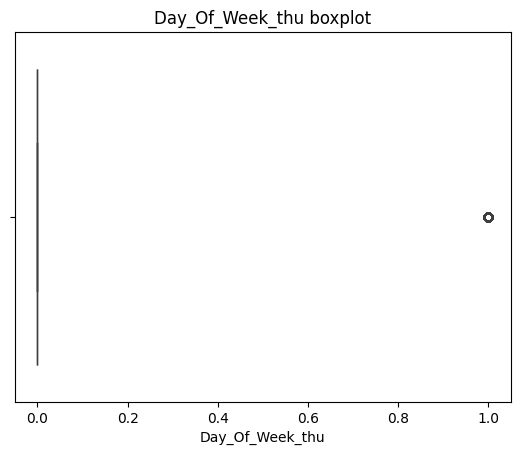

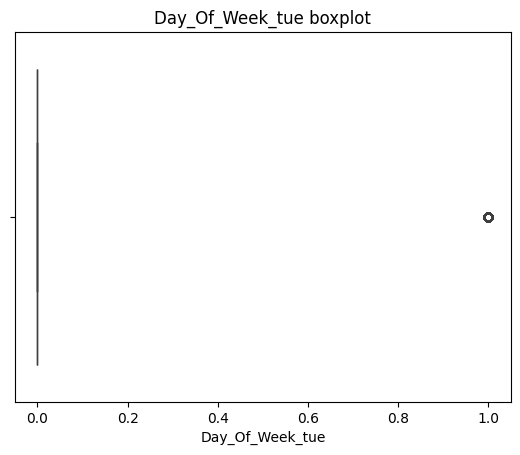

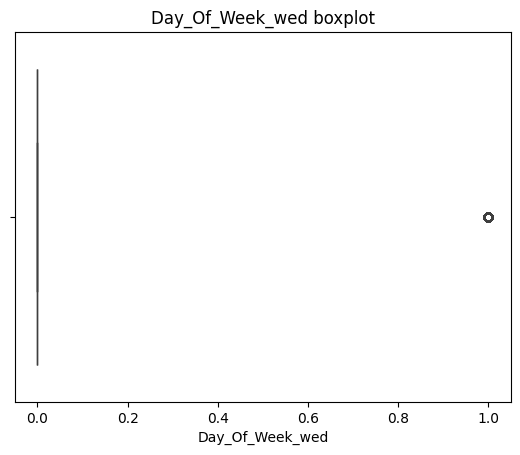

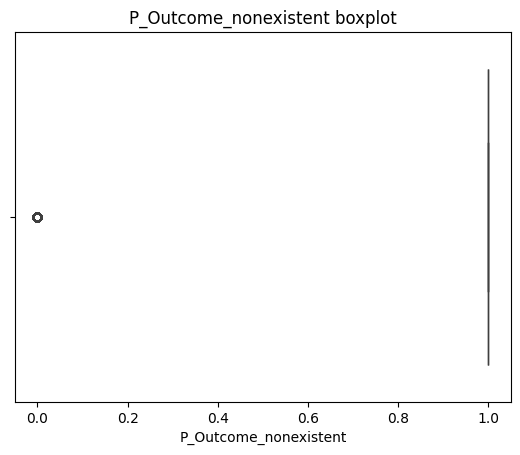

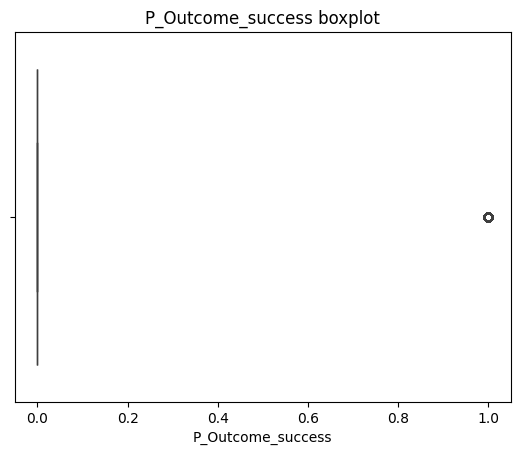

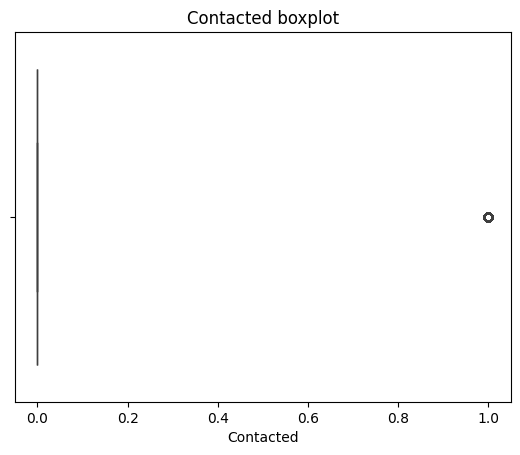

In [31]:
cols = data_encoded.columns
plt.figure(figsize=(8, 1))
for col in cols:
    sns.boxplot(data_encoded[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

## Correlation Analysis:
- Evaluate the correlation between features and the target label.
- Use `corr()` to compute the correlation matrix.

In [32]:
num_data=data_encoded.select_dtypes('number')
corr_matrix=num_data.corr()
corr_matrix

,Age,Education,Default,Housing_Loan,Personal_Loan,Month,Duration,Campaign,Previous,Employment_Var_Rate,...,Marital_single,Marital_unknown,Contact_telephone,Day_Of_Week_mon,Day_Of_Week_thu,Day_Of_Week_tue,Day_Of_Week_wed,P_Outcome_nonexistent,P_Outcome_success,Contacted
Age,1.000000,-0.114959,0.171179,-0.002130,-0.007791,-0.027135,0.001989,0.003329,0.015740,-0.003025,...,-0.418928,0.001462,0.012043,0.020329,-0.021576,0.018657,-0.025002,-0.009706,0.027870,0.026581
Education,-0.114959,1.000000,-0.186823,0.016870,0.006433,-0.082725,-0.017828,0.002401,0.038874,-0.057092,...,0.151691,0.011163,-0.105738,0.006650,0.014774,-0.008789,-0.018437,-0.029139,0.045044,0.046637
Default,0.171179,-0.186823,1.000000,-0.015803,-0.003829,-0.015778,-0.013663,0.037012,-0.102463,0.209146,...,-0.123687,-0.007747,0.135267,0.006891,-0.004905,0.003749,-0.009644,0.104000,-0.075779,-0.080094
Housing_Loan,-0.002130,0.016870,-0.015803,1.000000,0.044261,-0.018031,-0.009855,-0.010884,0.021284,-0.059686,...,0.014454,-0.008254,-0.082119,0.011791,0.011882,-0.010401,0.001662,-0.025123,0.012136,0.010501
Personal_Loan,-0.007791,0.006433,-0.003829,0.044261,1.000000,-0.005730,-0.007918,0.011655,-0.001377,0.002368,...,0.005112,-0.000916,-0.008598,0.005724,-0.002610,-0.008285,-0.002117,-0.000064,-0.001439,-0.000393
Month,-0.027135,-0.082725,-0.015778,-0.018031,-0.005730,1.000000,0.008250,-0.063789,0.103158,-0.172752,...,-0.006736,0.007731,0.276516,-0.035343,-0.044253,0.027762,0.035105,-0.114175,0.043490,0.047881
Duration,0.001989,-0.017828,-0.013663,-0.009855,-0.007918,0.008250,1.000000,-0.080168,0.037373,-0.043520,...,0.007619,0.011047,-0.036205,-0.023226,0.012218,0.007814,0.021262,-0.025005,0.062668,0.066930
Campaign,0.003329,0.002401,0.037012,-0.010884,0.011655,-0.063789,-0.080168,1.000000,-0.083848,0.146518,...,-0.005993,0.006388,0.071630,0.035656,-0.018531,-0.026949,-0.024192,0.091975,-0.057602,-0.059853
Previous,0.015740,0.038874,-0.102463,0.021284,-0.001377,0.103158,0.037373,-0.083848,1.000000,-0.425395,...,0.048501,0.009091,-0.212911,-0.002027,0.001560,0.000142,-0.003984,-0.878771,0.524037,0.587455
Employment_Var_Rate,-0.003025,-0.057092,0.209146,-0.059686,0.002368,-0.172752,-0.043520,0.146518,-0.425395,1.000000,...,-0.097566,-0.007570,0.413231,-0.018510,-0.008455,0.012032,0.025565,0.470378,-0.275346,-0.291095


In [33]:
target_corr = corr_matrix['Subscribed'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 Subscribed               1.000000
Duration                 0.401304
Contacted                0.324909
P_Outcome_success        0.316301
Previous                 0.230199
Job_student              0.093961
Job_retired              0.092362
Education                0.057769
Marital_single           0.054203
Consumer_Conf_idx        0.053898
Age                      0.020915
Job_unemployed           0.014748
Day_Of_Week_thu          0.013793
Housing_Loan             0.011604
Day_Of_Week_tue          0.008141
Day_Of_Week_wed          0.006285
Marital_unknown          0.005210
Job_unknown             -0.000155
Job_management          -0.000429
Job_self-employed       -0.004670
Personal_Loan           -0.004925
Month                   -0.006044
Job_technician          -0.006073
Job_housemaid           -0.006512
Job_entrepreneur        -0.016653
Day_Of_Week_mon         -0.021246
Job_services            -0.032265
Marital_married         -0.043469
Consumer_Price_idx    

# Heatmap:
- A heatmap visualizes the correlation matrix.

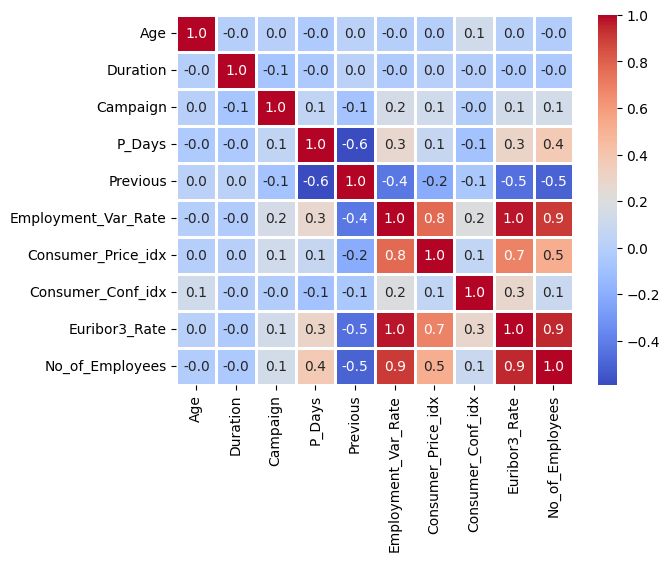

In [34]:
num_data=df.select_dtypes('number')
corr_matrix=num_data.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=2,cmap='coolwarm',fmt='.1f')
plt.show()

<div class="alert alert-block alert-info">
    <h1> 2-Visulaization :</h1>
    
- Visualization allows us to quickly grasp complex data by presenting it in a visual format, making it easier to identify patterns, trends, and outliers that may not be apparent in raw data

</div>

##  Categorical Variables
### Bar Plot to Visualize the Distribution of Each Column

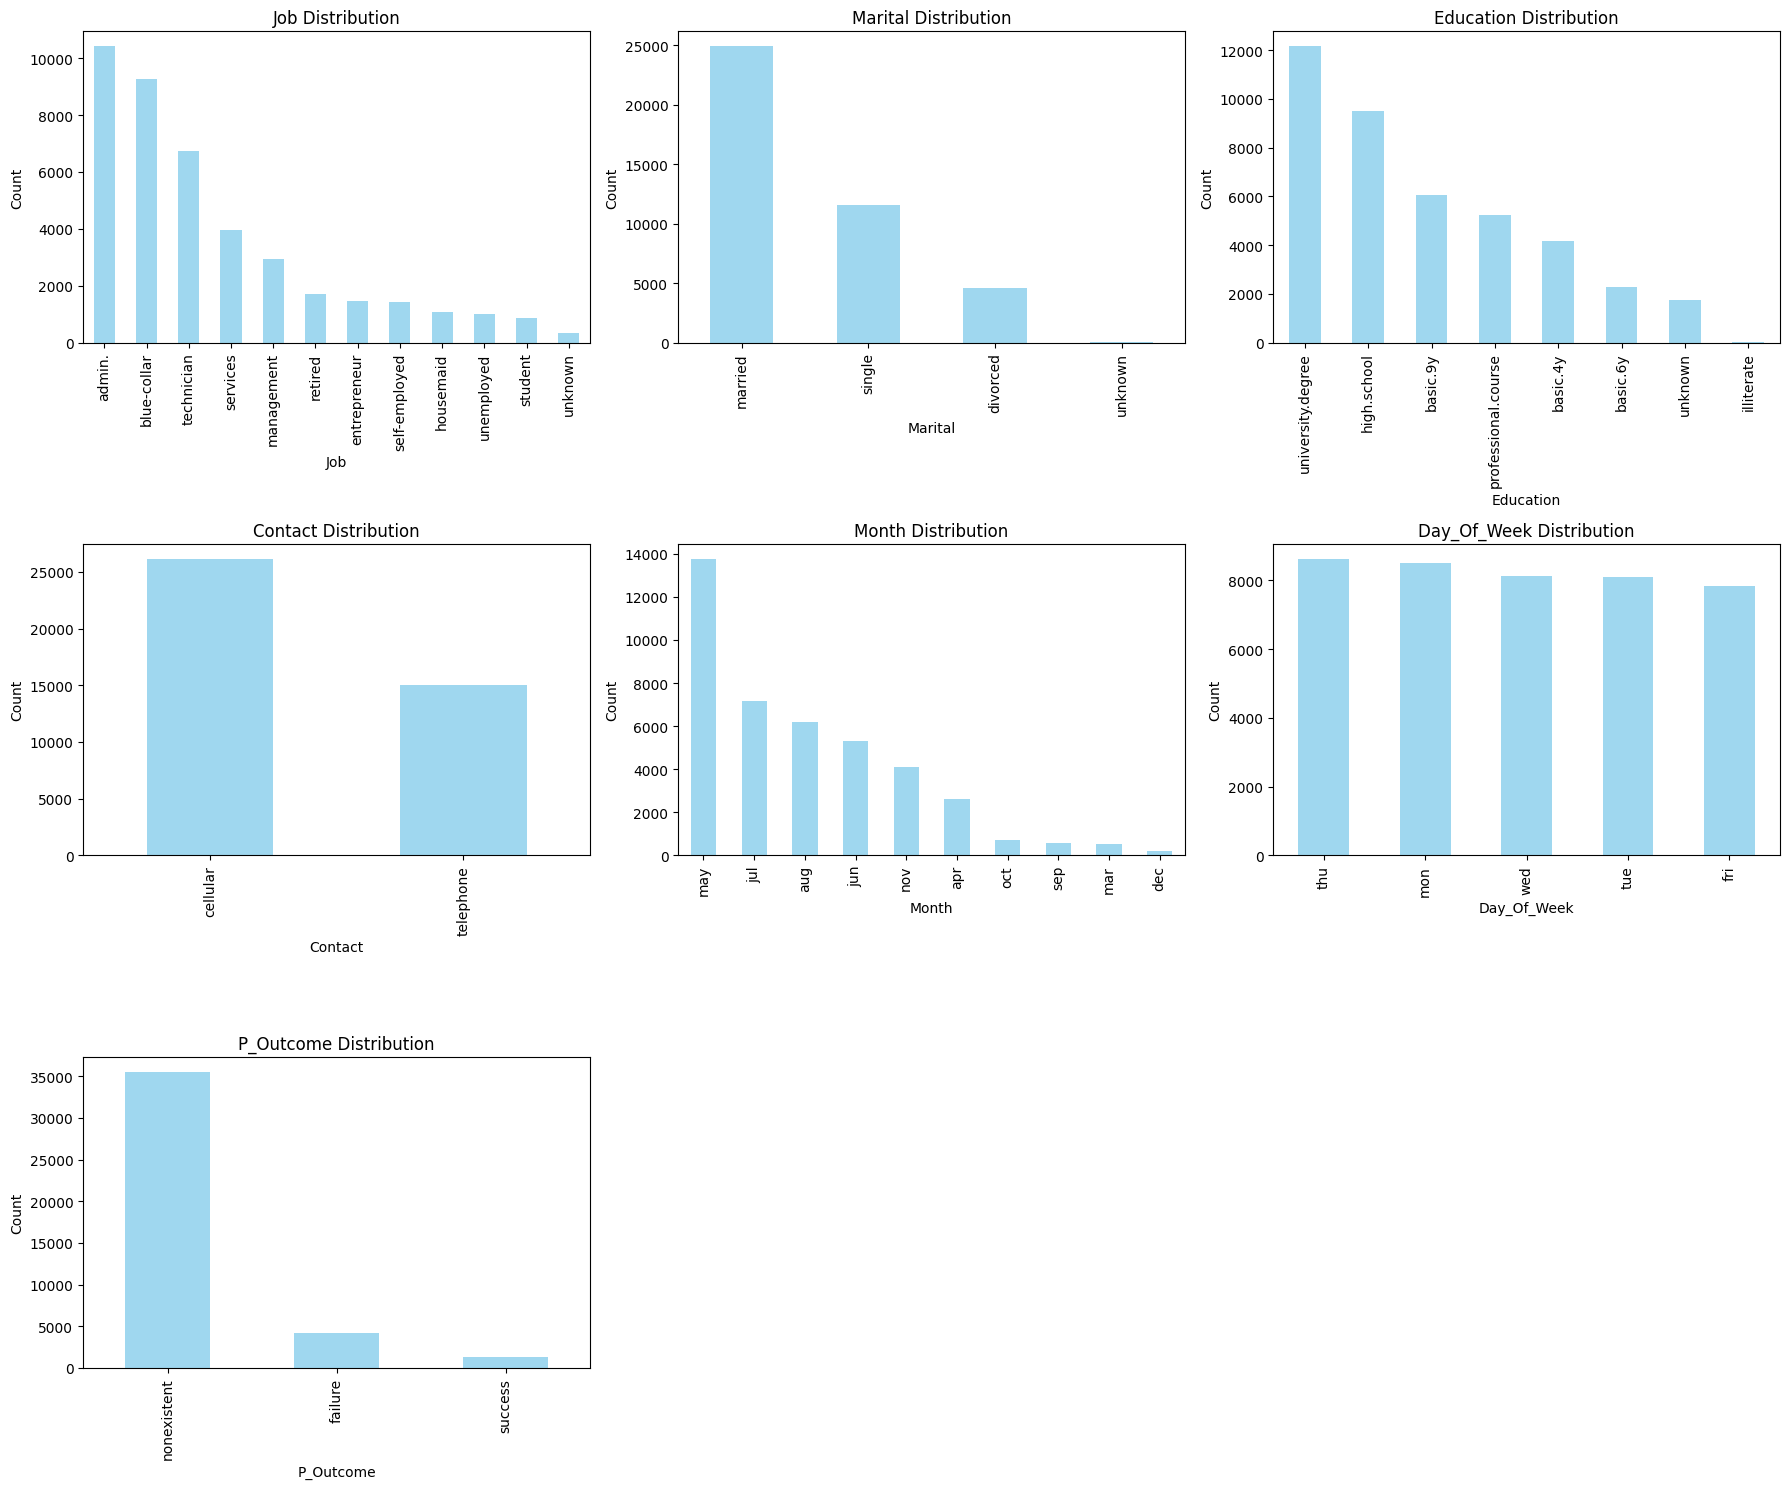

In [35]:
categorical_cols = ['Job', 'Marital', 'Education', 'Contact', 'Month', 'Day_Of_Week', 'P_Outcome']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', alpha=0.8)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The chart presents the distribution of key demographic and contact attributes in the dataset:

1. **Job Distribution**: Administrative and blue-collar jobs dominate, while categories like student and unemployed are less common.

2. **Marital Status**: A significant portion of the population is married, followed by single individuals.

3. **Education Level**: Most individuals have either a university degree or high school education, with fewer reporting lower education levels.

4. **Contact Methods**: Cellular contacts are overwhelmingly preferred over telephonic ones.

5. **Monthly Distribution**: Higher contact counts are observed in May, indicating possible seasonal trends.

6. **Days of the Week**: There's consistent engagement across all days, with no significant variations.

7. **Outcome Distribution**: The majority fall under the 'non-event' category, emphasizing a need for targeted strategies to address failures and successes.


## Numerical Variables


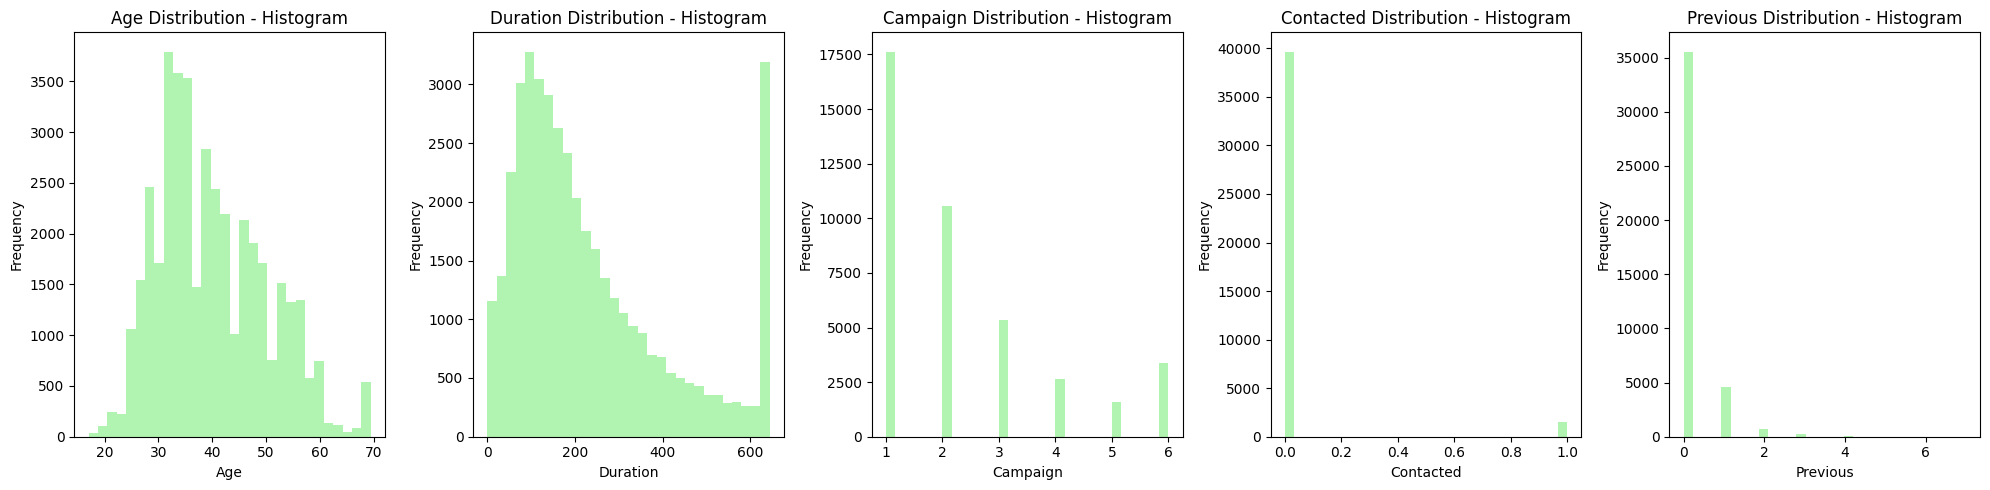

In [36]:
numerical_cols = ['Age', 'Duration', 'Campaign', 'Contacted', 'Previous']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    axes[i].hist(data_encoded[col], bins=30, color='lightgreen', alpha=0.7)
    axes[i].set_title(f'{col} Distribution - Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms provide a clear overview of various distributions within the dataset:

1. **Age Distribution**: The age histogram shows a bimodal distribution, peaking around 30 and 50 years, indicating targeted demographic segments.

2. **Duration Distribution**: Duration has a long tail, with most interactions lasting under 200 seconds, but a few extending significantly longer, suggesting varying engagement levels.

3. **Campaign Distribution**: Most contacts fall within the first campaign, with diminishing frequency in subsequent campaigns, highlighting a potential drop-off in participation.

4. **Contacted Distribution**: Nearly all individuals are marked as not contacted (0), raising questions about outreach effectiveness.

5. **Previous Distribution**: Most individuals have zero previous contacts, indicating limited prior engagement efforts.


## RelationShips:

### categorical vs categorical:

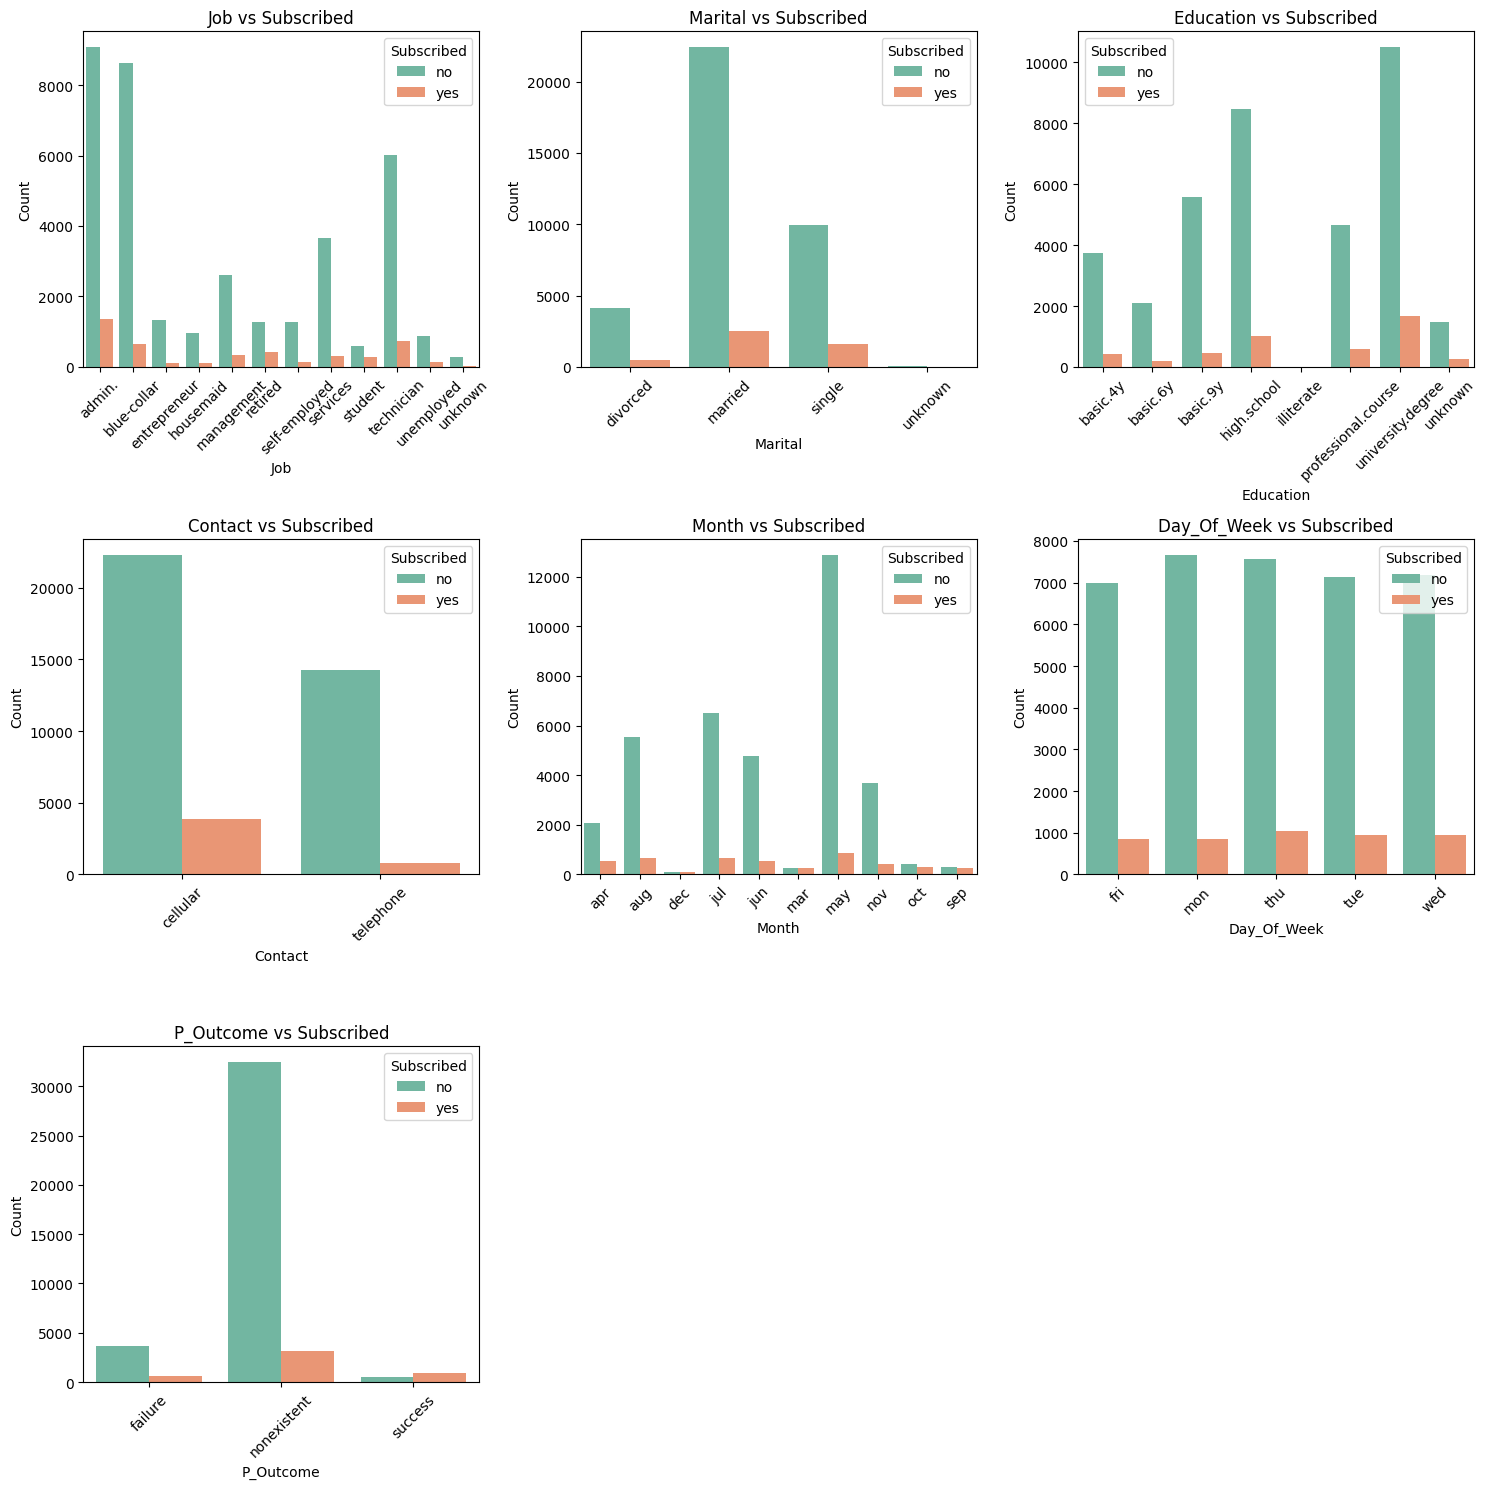

In [37]:
categorical_columns = ['Job', 'Marital', 'Education', 'Contact', 'Month', 'Day_Of_Week', 'P_Outcome']
target = 'Subscribed'

fig, axes = plt.subplots(nrows=len(categorical_columns)//3 + (len(categorical_columns) % 3 > 0), ncols=3, figsize=(15, 5 * (len(categorical_columns)//3 + (len(categorical_columns) % 3 > 0))))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue=target, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The charts provide insightful correlations between demographic factors and subscription outcomes:

1. **Job vs. Subscribed**: Certain occupations, particularly blue-collar and administrative, show higher subscription rates, indicating targetable demographics.

2. **Marital Status**: The majority of subscriptions are from married individuals, suggesting a possible preference or interest among this group.

3. **Education Level**: Higher education levels correlate with increased subscriptions, highlighting the importance of targeting educated prospects.

4. **Contact Method**: Cellular contact clearly dominates and correlates with higher subscription rates, which implies the effectiveness of this contact method.

5. **Monthly Trends**: May stands out as the peak month for subscriptions, suggesting seasonal marketing opportunities.

6. **Day of the Week**: Subscription rates are consistent across the week, with no clear preference for specific days.

7. **Previous Outcome**: The overwhelming number of failures in previous campaigns suggests a critical need for strategy reassessment to improve future engagement.



### numerical vs numerical:

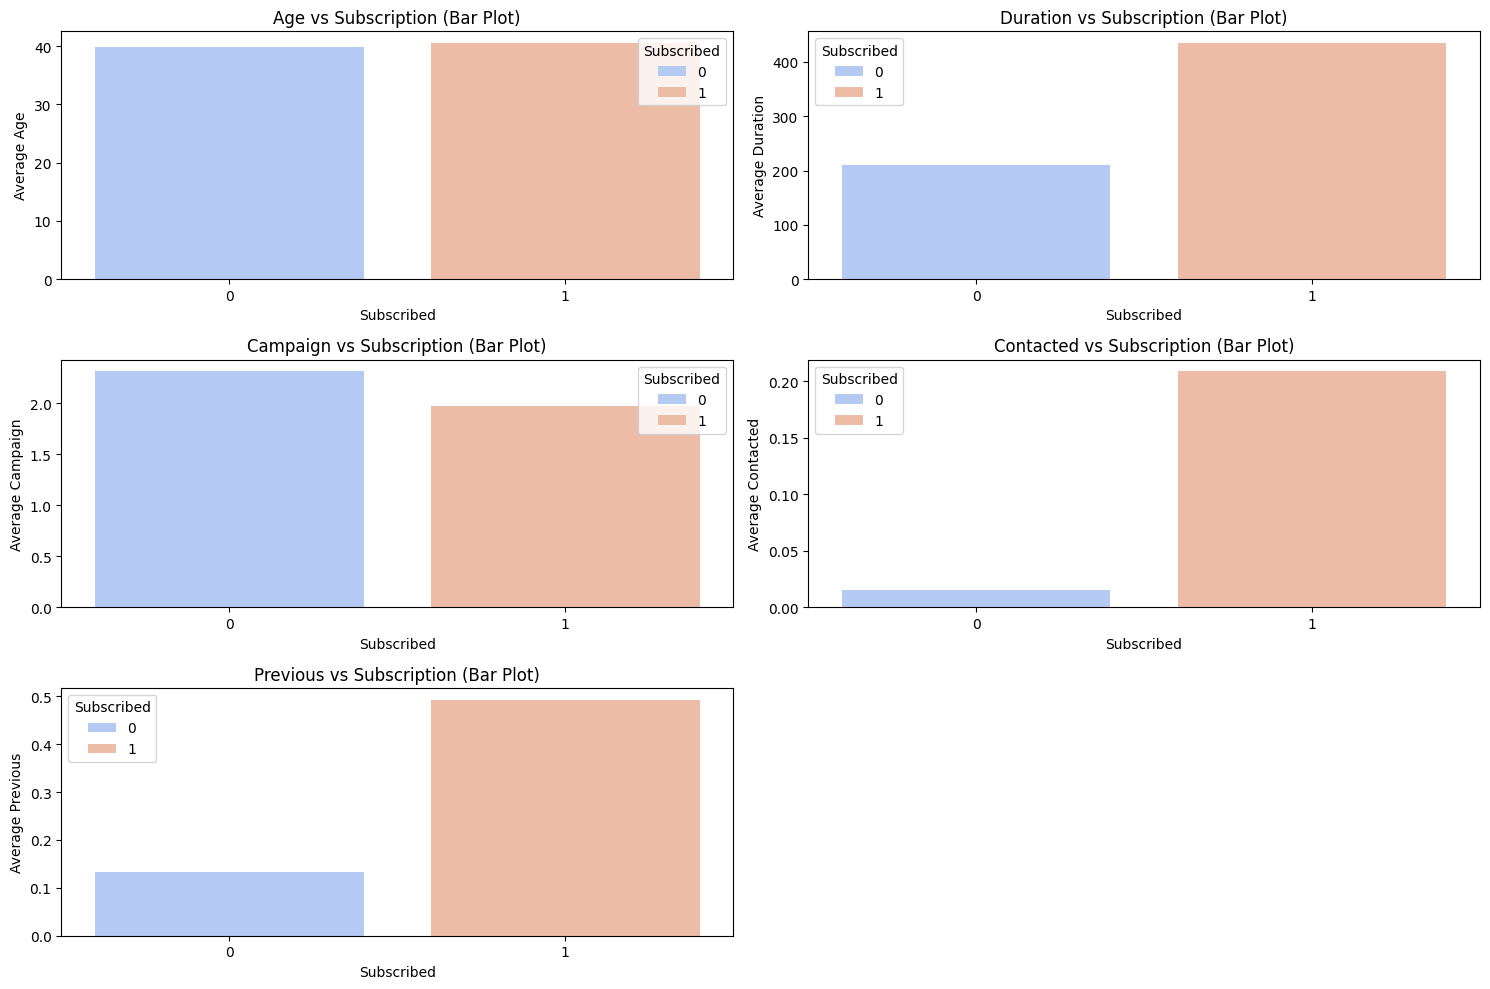

In [38]:
numerical_cols = ['Age', 'Duration', 'Campaign', 'Contacted', 'Previous']

fig, axes = plt.subplots(nrows=len(numerical_cols)//2 + len(numerical_cols) % 2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.barplot(x='Subscribed', hue='Subscribed', y=col, data=data_encoded, palette='coolwarm', ci=None, ax=axes[i])
    axes[i].set_title(f'{col} vs Subscription (Bar Plot)')
    axes[i].set_ylabel(f'Average {col}')
    axes[i].set_xlabel('Subscribed')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The bar plots reveal key relationships between various factors and subscription outcomes:

1. **Age**: Average age is higher in the subscribed group, suggesting older clients may be more receptive to the offerings.

2. **Duration**: Subscribed individuals exhibit significantly longer call durations, indicating that engagement impacts subscription likelihood.

3. **Campaign Attempts**: The average number of contacts is noticeably higher for non-subscribers, implying that repeated outreach may not be effective.

4. **Contacted**: Very few individuals were contacted but did not subscribe, highlighting the potential effectiveness of targeted outreach.

5. **Previous Contacts**: Subscribed individuals show a higher average of previous contacts, suggesting that engagement history positively influences subscription rates.



## Target Distribution:

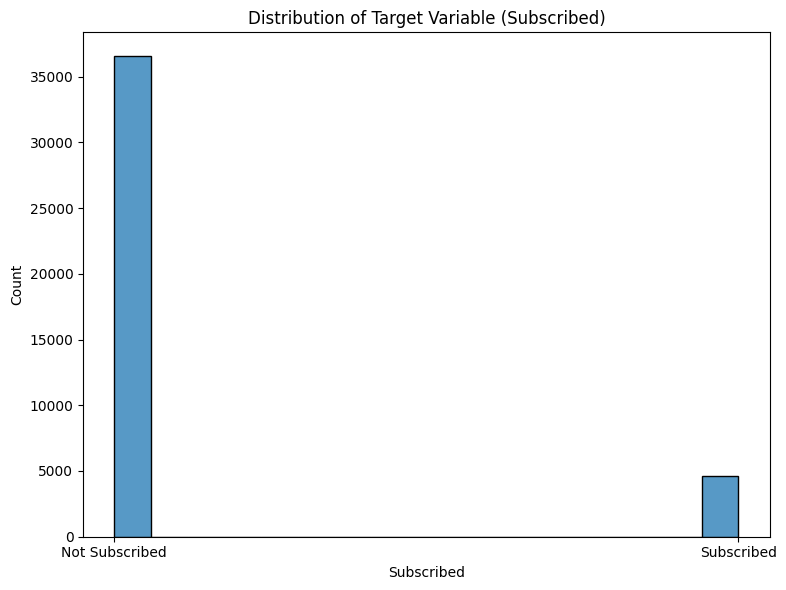

In [39]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data_encoded, x='Subscribed', palette='coolwarm')
plt.title('Distribution of Target Variable (Subscribed)')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Subscribed', 'Subscribed'], rotation=0)
plt.tight_layout()
plt.show()


In [40]:
data_encoded['Subscribed'].value_counts()

,count
Subscribed,
0,36536
1,4639


- From the histogram of the target column and its value_counts, it is evident that the target variable is highly imbalanced, with one class significantly outweighing the other. This imbalance may affect the model's performance and requires appropriate handling.

# 3- Feature Engineering

- Most Signficant with the Target:

In [41]:
from scipy.stats import chi2_contingency

target = 'Subscribed'
weak_relation_cols = []
strong_relation_cols=[]
for col in data_encoded:
    crosstab = pd.crosstab(data_encoded[col], data_encoded[target])

    chi2, p, dof, expected = chi2_contingency(crosstab)
    if p < 0.05:
        strong_relation_cols.append(col)
    else:
        weak_relation_cols.append(col)


print('\nColumns with weak relationship with the target:')
print(weak_relation_cols)
print('-'*50)
print('\nColumns with Strong relationship with the target:')
print(strong_relation_cols)



Columns with weak relationship with the target:
['Housing_Loan', 'Personal_Loan', 'Job_housemaid', 'Job_management', 'Job_self-employed', 'Job_technician', 'Job_unknown', 'Marital_unknown', 'Day_Of_Week_tue', 'Day_Of_Week_wed']
--------------------------------------------------

Columns with Strong relationship with the target:
['Age', 'Education', 'Default', 'Month', 'Duration', 'Campaign', 'Previous', 'Employment_Var_Rate', 'Consumer_Price_idx', 'Consumer_Conf_idx', 'Euribor3_Rate', 'No_of_Employees', 'Subscribed', 'Job_blue-collar', 'Job_entrepreneur', 'Job_retired', 'Job_services', 'Job_student', 'Job_unemployed', 'Marital_married', 'Marital_single', 'Contact_telephone', 'Day_Of_Week_mon', 'Day_Of_Week_thu', 'P_Outcome_nonexistent', 'P_Outcome_success', 'Contacted']


- Drop the weak relationship with the target:

In [42]:
data_encoded.drop(columns=weak_relation_cols,axis=1,inplace=True)
data_encoded.head()

,Age,Education,Default,Month,Duration,Campaign,Previous,Employment_Var_Rate,Consumer_Price_idx,Consumer_Conf_idx,...,Job_student,Job_unemployed,Marital_married,Marital_single,Contact_telephone,Day_Of_Week_mon,Day_Of_Week_thu,P_Outcome_nonexistent,P_Outcome_success,Contacted
0,56.0,0,0,6,261.0,1,0,1,93,-36,...,0,0,1,0,1,1,0,1,0,0
1,57.0,3,1,6,149.0,1,0,1,93,-36,...,0,0,1,0,1,1,0,1,0,0
2,37.0,3,0,6,226.0,1,0,1,93,-36,...,0,0,1,0,1,1,0,1,0,0
3,40.0,1,0,6,151.0,1,0,1,93,-36,...,0,0,1,0,1,1,0,1,0,0
4,56.0,3,0,6,307.0,1,0,1,93,-36,...,0,0,1,0,1,1,0,1,0,0


## 4- Split the Data:
- Divide Dataset for Training and Testing:
- x: features , y: target label

In [43]:
X=data_encoded.drop('Subscribed',axis=1)
y=data_encoded[['Subscribed']]

In [44]:
print(X.shape)
print(y.shape)

(41175, 26)
(41175, 1)


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 5-Normalization
- Scaling Features to a Common Range using Standard Scaler.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div class="alert alert-block alert-success">
    <h1> 6-Machine Learning Model :</h1>
</div>

## 1. Logistic Regression:

### Import Logistic Regression Model
- Import the Logistic Regression model from the sklearn library.
- Train the model using `fit()`.
- Predict output using `predict()`.

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced',
                           random_state=42,
                          C=0.1,
                           max_iter=100,
                           penalty='l2',
                           solver='saga'
                          )

model.fit(X_train_scaled, y_train)
y_pred_logistic= model.predict(X_test_scaled)
accuracy_logistic=accuracy_score(y_test, y_pred_logistic)

### Evaluate the model:

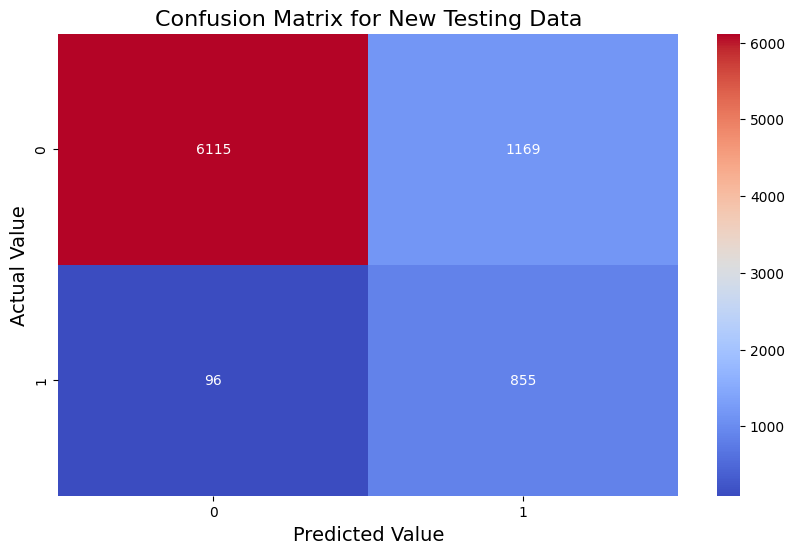

In [50]:
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [51]:
accuracy_score(y_test, y_pred_logistic)
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7284
           1       0.42      0.90      0.57       951

    accuracy                           0.85      8235
   macro avg       0.70      0.87      0.74      8235
weighted avg       0.92      0.85      0.87      8235



**ROC Curve and AUC Score:**

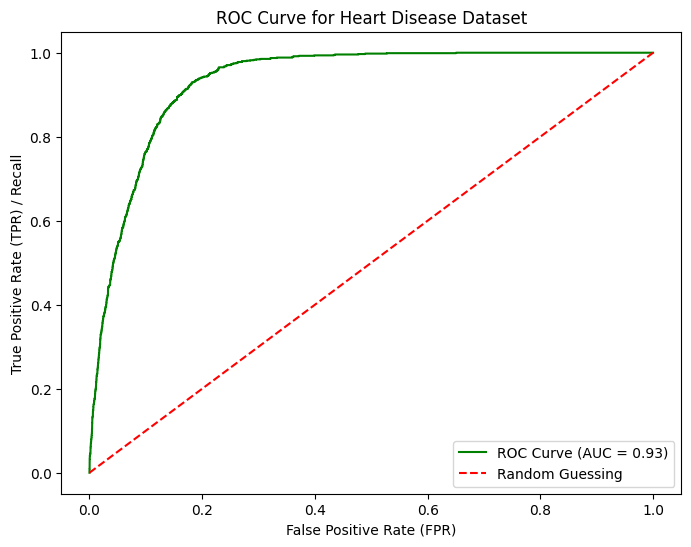

In [52]:
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing', color='red')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('ROC Curve for Heart Disease Dataset')
plt.legend()
plt.show()

**Learning Curve**  
- Plotting the learning curve to evaluate underfitting and overfitting.

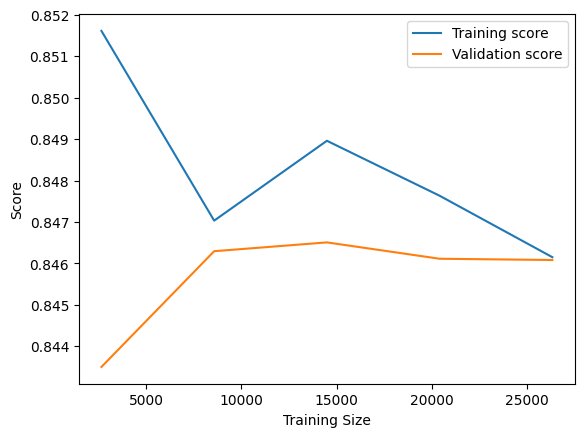

In [53]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

# Calculate the mean and standard deviation
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Ploting learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


# Exploring additional machine learning models to improve accuracy:

## 2. Naive Byas

### Import Naive Byas Model
- Import the Naive Byas model from the sklearn library.
- Train the model using `fit()`.
- Predict output using `predict()`.

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(var_smoothing=1e-5)
nb_classifier.fit(X_train, y_train)
y_pred_NB = nb_classifier.predict(X_test)
accuracy_NB=accuracy_score(y_test, y_pred_NB)

**Evaluate the Model**

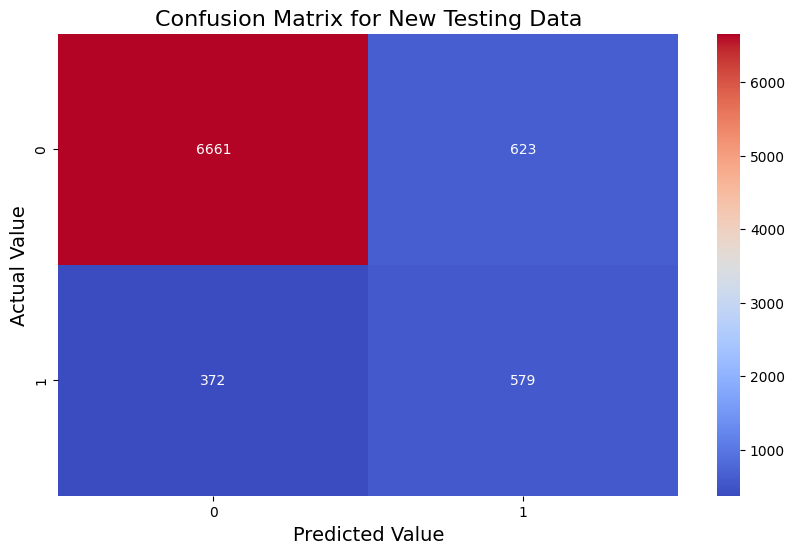

In [157]:
cm_naive = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm_naive, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [56]:
accuracy_score(y_test, y_pred_NB)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7284
           1       0.48      0.61      0.54       951

    accuracy                           0.88      8235
   macro avg       0.71      0.76      0.73      8235
weighted avg       0.89      0.88      0.89      8235



**- Learning Curve**  
- Plotting the learning curve to evaluate underfitting and overfitting.

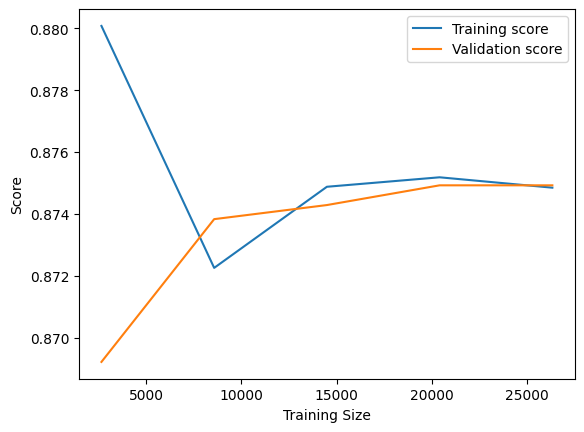

In [57]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(nb_classifier, X_train, y_train, cv=5)

# Calculate the mean and standard deviation
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Ploting learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


## 3. Random Forest

### Import Random Forest classfication Model
- importing the Random Forest model from sklearn library
- train the data using fit()
- predict the output using predict()

In [147]:
rf_model = RandomForestClassifier(n_estimators=300,
                                  max_depth=100,
                                  min_samples_split=83,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  bootstrap=True,
                                  random_state=0
                                  )

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf=accuracy_score(y_test, y_pred_rf)

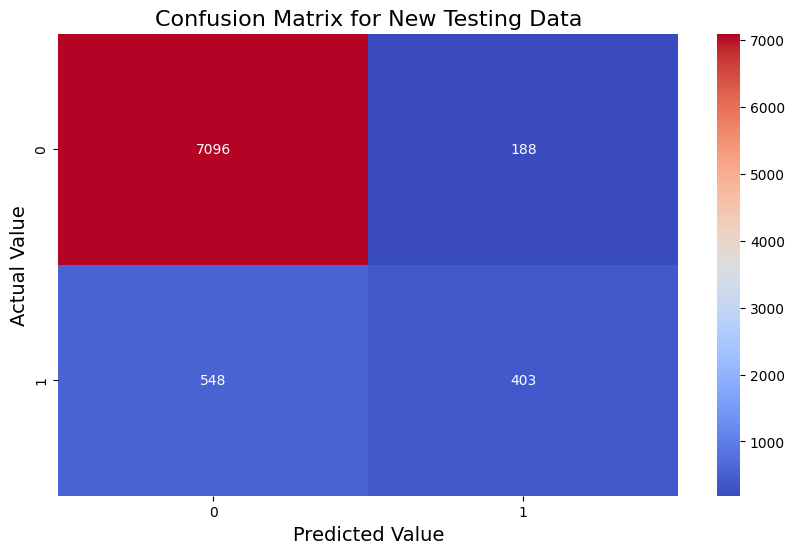

In [156]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [149]:
accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7284
           1       0.68      0.42      0.52       951

    accuracy                           0.91      8235
   macro avg       0.81      0.70      0.74      8235
weighted avg       0.90      0.91      0.90      8235



**Learning Curve**  
- Plotting the learning curve to evaluate underfitting and overfitting.

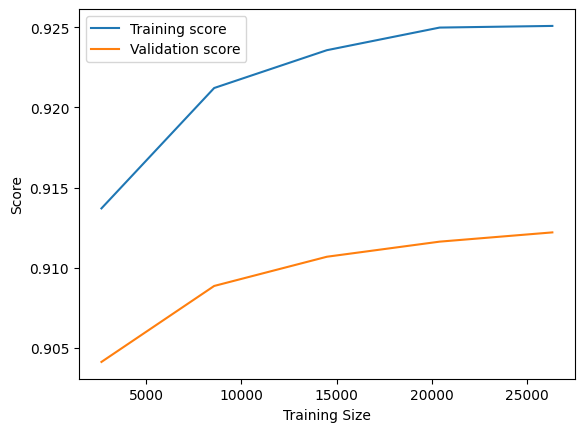

In [150]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train_scaled, y_train, cv=5)

# Calculate the mean and standard deviation
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Ploting learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


## 4. Decision Tree Model:

### a-Import Decision Tree Model
- importing the Decision Tree Model from sklearn library
- train the data using fit()
- predict the output using predict()

In [141]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=10,
                                  min_samples_split=83,
                                  min_samples_leaf=2,
                                  max_features=None,
                                  splitter='random',
                                  random_state=182,

                                  )

dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
accuracy_dt=accuracy_score(y_test, y_pred_dt)

**Evaluate the Model:**

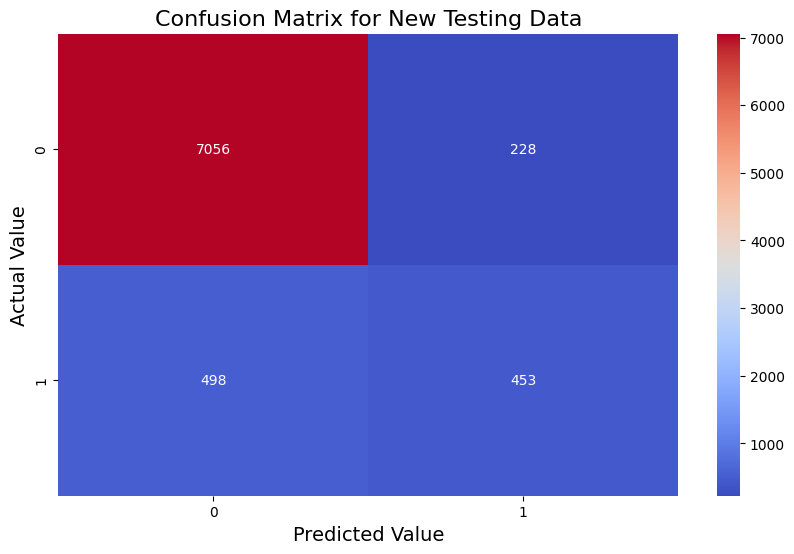

In [155]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()

In [143]:
accuracy_score(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7284
           1       0.67      0.48      0.56       951

    accuracy                           0.91      8235
   macro avg       0.80      0.72      0.75      8235
weighted avg       0.90      0.91      0.91      8235



**Learning Curve**  
- Plotting the learning curve to evaluate underfitting and overfitting.

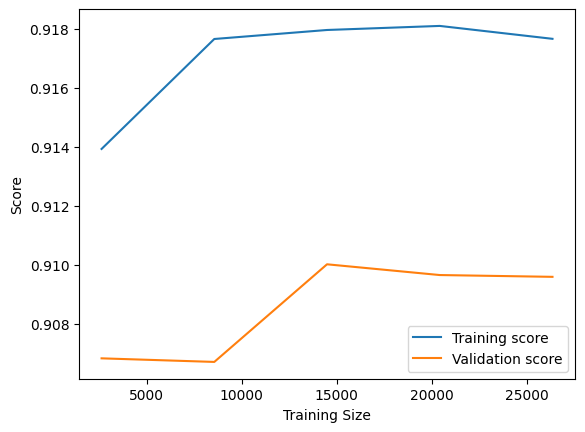

In [151]:
# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(dt_model, X_train_scaled, y_train, cv=5)

# Calculate the mean and standard deviation
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Ploting learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


## 4. XGB boost Model:

### Import Logistic Regression Model
- Import the XGB boost model from the sklearn library.
- Train the model using `fit()`.
- Predict output using `predict()`.

In [201]:
xgb_model=XGBClassifier(random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          n_estimators=200,
                          learning_rate=0.01,
                          max_depth=15,
                          min_child_weight=3,
                          gamma=0.1,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          scale_pos_weight=2,

                          )

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb=accuracy_score(y_test, y_pred_xgb)

### Evaluate the model:

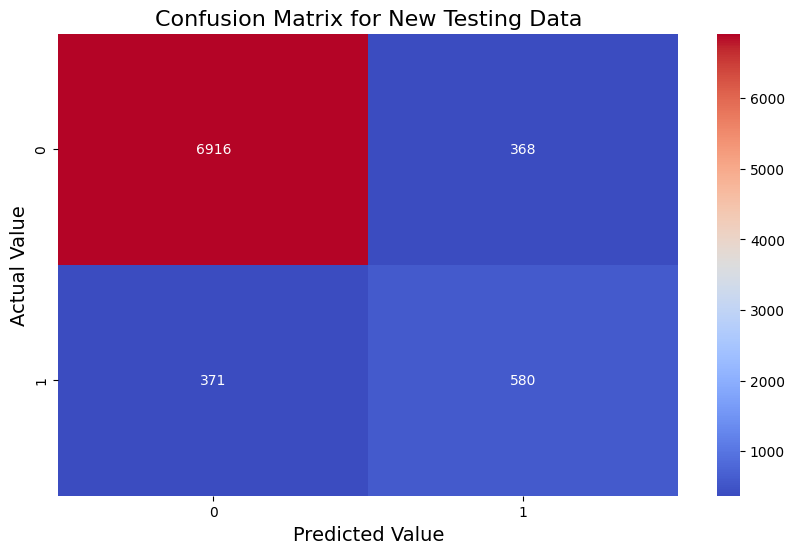

In [202]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,6))
plt.title('Confusion Matrix for New Testing Data', fontsize=16)
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)
plt.show()



In [203]:
accuracy_score(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7284
           1       0.61      0.61      0.61       951

    accuracy                           0.91      8235
   macro avg       0.78      0.78      0.78      8235
weighted avg       0.91      0.91      0.91      8235



# Exploring Deep Learning model to improve accuracy:

### ANN Model:

In [213]:
print(X_train_scaled.shape)
print(y_train.shape)

(32940, 26)
(32940, 1)


In [242]:
from tensorflow.keras.layers import Dense, Dropout

ann_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')

])

ann_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


ann_model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                     │ (None, 128)                 │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the ANN model:

In [243]:
from gc import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

check_point=ModelCheckpoint('best_model.keras',monitor='val_accuracy',mode='max',save_best_only=True)

history = ann_model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    validation_split=0.2,
    callbacks=[check_point]
)


Epoch 1/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8903 - loss: 0.2696 - val_accuracy: 0.9058 - val_loss: 0.1977
Epoch 2/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9030 - loss: 0.2082 - val_accuracy: 0.9061 - val_loss: 0.1937
Epoch 3/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9059 - loss: 0.2006 - val_accuracy: 0.9071 - val_loss: 0.1912
Epoch 4/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9113 - loss: 0.1909 - val_accuracy: 0.9093 - val_loss: 0.1896
Epoch 5/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9093 - loss: 0.1910 - val_accuracy: 0.9084 - val_loss: 0.1911
Epoch 6/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 0.1920 - val_accuracy: 0.9087 - val_loss: 0.1903
Epoch 7/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9122 - loss: 0.1853 - val_accuracy: 0.9099 - val_loss: 0.1894
Epoch 8/50
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9087 - loss: 0.1880 -

## Evaluate the Model

In [244]:
from tensorflow.keras.metrics import Accuracy

loss, accuracy = ann_model.evaluate(X_test_scaled, y_test)

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9102 - loss: 0.1791


### Ploting all models accuarcy to predict best model

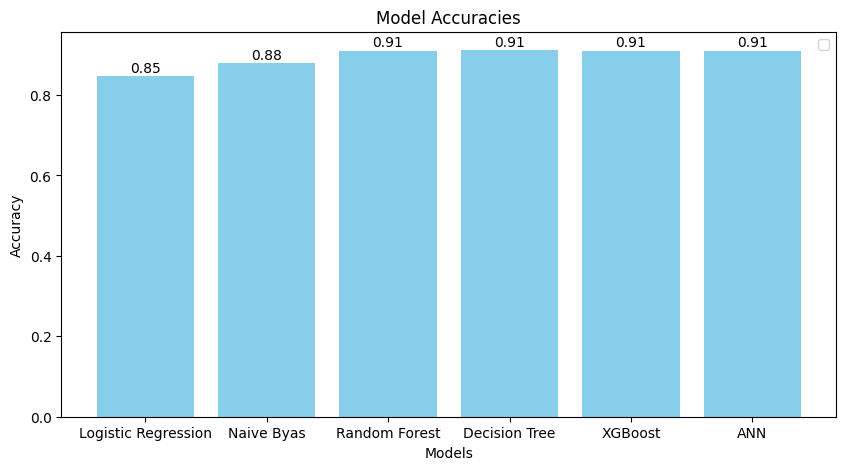

In [249]:
# Collecting accuracies and model names
accuracies=[accuracy_logistic,accuracy_NB,accuracy_rf,accuracy_dt,accuracy_xgb,accuracy]
models=['Logistic Regression','Naive Byas','Random Forest','Decision Tree','XGBoost','ANN']

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Adding accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.legend()
plt.show()

- The chart compares the accuracies of several machine learning models. Most models (Random Forest, Decision Tree, XGBoost, and ANN).achieve high accuracy scores of 0.91, indicating strong performance. Logistic Regression (0.85) and Naive Bayes (0.88).


### Detailed Project Summary: Bank Marketing

The Bank Marketing project is an analytical study aimed at understanding the factors influencing client subscriptions to term deposits through a comprehensive examination of a marketing campaign dataset. This dataset consists of 41,188 records and includes a variety of attributes related to client demographics, financial status, and campaign interactions, which are crucial for developing effective marketing strategies.

#### Dataset Overview
The dataset features several key attributes:

- **Demographic Information:** Age, job type, marital status, education level.
- **Financial Indicators:** Default status, housing loan status, personal loan status.
- **Campaign Details:** Contact method, month and day of last contact, duration of calls, number of contacts made during the campaign, days since last contact from a previous campaign, previous campaign outcomes, and economic indicators such as employment variation rate and consumer confidence index.

#### Objectives
The primary objectives of the project are to:
1. Identify target demographics that are more likely to subscribe to term deposits.
2. Assess the effectiveness of various contact methods used during marketing campaigns.
3. Evaluate the performance of previous campaigns to inform future marketing strategies.

#### Data Processing and Analysis Steps
1. **Data Exploration:** Initial examination of the dataset to understand its structure, data types, and potential missing values.
2. **Handling Missing Values:** The dataset was found to have no missing values.
3. **Outlier Detection:** Statistical methods were employed to identify and manage outliers in several columns, including Age, Duration, Campaign, and Consumer Confidence Index.
4. **Feature Engineering:** Categorical variables were encoded using Label Encoding and One-Hot Encoding to prepare for modeling.
5. **Correlation Analysis:** A correlation matrix was computed to evaluate the relationships between features and the target variable, "Subscribed."

#### Key Findings and Results
- **Demographic Insights:** Higher subscription rates were observed among blue-collar and administrative job roles, with married individuals constituting the majority of subscribers.
  
- **Education and Subscription Rates:** A significant correlation was found between higher education levels and increased subscription rates, indicating that marketing efforts should focus on educated prospects.

- **Effectiveness of Contact Methods:** Cellular communication emerged as the most effective contact method, correlating with higher subscription rates, suggesting a need to prioritize mobile outreach in future campaigns.

- **Seasonal Trends:** May was identified as the peak month for subscriptions, highlighting a seasonal trend that could be leveraged for targeted marketing efforts.

- **Campaign Performance Analysis:** Subscription rates remained consistent throughout the week, with no specific day showing a significant preference. However, a high number of failures in previous campaigns indicated the need for reassessment of marketing strategies to improve engagement and conversion rates.

- **Model Performance:** The project included predictive modeling using various algorithms, achieving the following results:
  - **Logistic Regression:** Accuracy of 85%, with a precision of 0.98 and recall of 0.84.
  - **Naive Bayes:** Accuracy of 88%, with a precision of 0.95 and recall of 0.91.
  - **Random Forest:** Accuracy of 91%, with a precision of 0.93 and recall of 0.97.
  - **Decision Tree:** Accuracy of 91%, with a precision of 0.93 and recall of 0.97.
  - **XGBoost:** Accuracy of 91%, with a precision of 0.95 and recall of 0.61.
  - **Artificial Neural Network (ANN):** Accuracy of 91%, with a loss of 0.1791.

#### Conclusion
The Bank Marketing project provides actionable insights that can enhance marketing strategies, improve client engagement, and ultimately increase subscription rates for term deposits. By leveraging the findings from the analysis, the bank can better target its marketing efforts, optimize communication methods, and refine its approach to future campaigns. This comprehensive understanding of client behavior and preferences will enable the bank to improve overall effectiveness and client satisfaction in its marketing initiatives.
